##Install Spacy and Other Modules
We do this first because we need to restart the runtime after installation

In [ ]:
#Install Spacy and Download the Transformer model
!pip install spacy
!pip install cupy # Using cupy-cuda112 for compatibility
!pip install thinc-gpu-ops
!python -m spacy download en_core_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 50.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for cupy
  Running setup.py clean for cupy
Failed to build cupy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (cupy)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.5/483.5 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for thinc-gpu-ops
  Running setup.py clean for thinc-gpu-ops
Failed

In [ ]:
!sudo update-alternatives --config python3

update-alternatives: error: no alternatives for python3


##Mount and Import Google Drive


In [2]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive'

Mounted at /content/drive
/content/drive


In [3]:
#Import sys and append the google drive paths
import sys
models_path = '/content/drive/MyDrive/spaBERT/spabert'
sys.path.append(models_path)
sys.path.append('/content/drive/MyDrive/spaBERT/spabert/datasets')
sys.path.append("../")
print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor', '/root/.ipython', '/content/drive/MyDrive/spaBERT/spabert', '/content/drive/MyDrive/spaBERT/spabert/datasets', '../']


##Import Spacy and Load the Transformer Model


In [ ]:
#Import Spacy
import spacy
from spacy import displacy

if spacy.prefer_gpu():
    print("GPU is enabled for spaCy")
else:
    print("GPU is not enabled for spaCy")
#Load the Transformer Model
nlp = spacy.load('en_core_web_trf')

#Print out the Pipeline
print(nlp.pipe_names)

In [ ]:
##EXAMPLE: Import sample sentence to test out the model and ensure spacy is working.
#from spacy.lang.en.examples import sentences
#
#spacy.require_gpu()
#doc = nlp(sentences[0] + "\n")
#
## Display Entities
#from IPython.core.display import display, HTML
#display(HTML(displacy.render(doc, style="ent")))
#
#
## document level
#ents = [(e.text, e.start_char, e.end_char, e.label_, e.kb_id_) for e in doc.ents]
#print(ents)

##Define Some Functions and Import some Packages
Various user defined functions and pacakages that will be used throughout the notebook

In [4]:
# install pip
!curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py
!python3 get-pip.py --force-reinstall

#install colab's dependencies
!python3 -m pip install ipython ipython_genutils ipykernel jupyter_console prompt_toolkit httplib2 astor

# link to the old google package
!ln -s /usr/local/lib/python3.9/dist-packages/google \
       /usr/local/lib/python3.8/dist-packages/google

# There has got to be a better way to do this...but there's a bad import in some of the colab files
# IPython no longer exposes traitlets like this, it's a separate package now
!sed -i "s/from IPython.utils import traitlets as _traitlets/import traitlets as _traitlets/" /usr/local/lib/python3.8/dist-packages/google/colab/*.py
!sed -i "s/from IPython.utils import traitlets/import traitlets/" /usr/local/lib/python3.8/dist-packages/google/colab/*.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Failed to create the file get-pip.py: Operation not supported
  0 2213k    0 16384    0     0   206k      0  0:00:10 --:--:--  0:00:10  205k
curl: (23) Failure writing output to destination
python3: can't open file '/content/drive/get-pip.py': [Errno 2] No such file or directory
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
ln: failed to create symbolic link '/usr/local/lib/python3.8/dist-packages/google': No such file or directory
sed: can't read /usr/local/lib/python3.8/dist-packages/google/colab/*.py: No such file or directory
sed: can't read /usr/local/lib/python3.8/dist-packages/google/colab/*.py: No such file or directory


In [5]:
#check python version
import sys
print(sys.version)
!python3 --version
!python --version

3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
Python 3.10.12
Python 3.10.12


In [6]:
!pip list | grep packaging

packaging                        24.1


In [1]:
pip install packaging==21.3

In [28]:
!pip install transformers==4.3.2
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install sentencepiece
!pip install pandas

import torch
import io
import torch.nn.functional as F
import random
import numpy as np
import time
import math
import datetime
import torch.nn as nn
from transformers import *
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import random
import pandas as pd
import pickle
import csv


##Set random values
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
if torch.cuda.is_available():
  torch.cuda.manual_seed_all(seed_val)

  Using cached transformers-4.3.2-py3-none-any.whl.metadata (36 kB)
  Using cached sacremoses-0.1.1-py3-none-any.whl.metadata (8.3 kB)
  Using cached tokenizers-0.10.3.tar.gz (212 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Using cached transformers-4.3.2-py3-none-any.whl (1.8 MB)
Using cached sacremoses-0.1.1-py3-none-any.whl (897 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (tokenizers)
Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1

In [9]:
# If there's a GPU available...
if torch.cuda.is_available():
    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [6]:
#--------------------------------
#  Transformer parameters
#--------------------------------
max_seq_length = 64
batch_size = 64

#--------------------------------
#  GAN-BERT specific parameters
#--------------------------------
# number of hidden layers in the generator,
# each of the size of the output space
num_hidden_layers_g = 1;
# number of hidden layers in the discriminator,
# each of the size of the input space
num_hidden_layers_d = 1;
# size of the generator's input noisy vectors
noise_size = 100
# dropout to be applied to discriminator's input vectors
out_dropout_rate = 0.2

# Replicate labeled data to balance poorly represented datasets,
# e.g., less than 1% of labeled material
apply_balance = True

#--------------------------------
#  Optimization parameters
#--------------------------------
learning_rate_discriminator = 5e-5
learning_rate_generator = 5e-5
epsilon = 1e-8
num_train_epochs = 10
multi_gpu = True
# Scheduler
apply_scheduler = False
warmup_proportion = 0.1
# Print
print_each_n_step = 10

#--------------------------------
#  Adopted Tranformer model
#--------------------------------
# Since this version is compatible with Huggingface transformers, you can uncomment
# (or add) transformer models compatible with GAN

#model_name = "bert-base-cased"
model_name = "bert-base-uncased"
#model_name = "roberta-base"
#model_name = "albert-base-v2"
#model_name = "xlm-roberta-base"
#model_name = "amazon/bort"

#--------------------------------
#  Retrieve the TREC QC Dataset
#--------------------------------
#! git clone https://github.com/crux82/ganbert

#  NOTE: in this setting 50 classes are involved
labeled_file = "/content/ganbert/data/labeled.tsv"
unlabeled_file = "/content/ganbert/data/unlabeled.tsv"
test_filename = "/content/ganbert/data/test.tsv"
opspam = "./data/opspam.txt"                                            #Don't have
chicago_unlab = "./data/chicago_unlab.txt"                              #Don't Have
opspam_test = "./data/opspam_test.txt"                                  #Don't have
review_content = "/content/drive/MyDrive/Master_Project_2024_JP/yelpZip/YelpZip/reviewContent"
metadata = "/content/drive/MyDrive/Master_Project_2024_JP/yelpZip/YelpZip/metadata"
outlabsp = "/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/Yelp_dataset_Sirish/outlabsp.txt"
outrevsp = "/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/Yelp_dataset_Sirish/outrevsp.txt"
#review_content = "./Yelp/YelpNYC/reviewContent"
#metadata = "./Yelp/YelpNYC/metadata"

In [29]:
transformer = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/model.saf

In [12]:
import random
import pickle
import csv
import json
import pandas as pd

# Function to convert a list to a string
def listToString(s):
    # initialize an empty string
    str1 = ""
    # traverse in the string
    for ele in s:
        str1 += ele
    # return string
    return str1


# Function to create a list from the dataset
def get_lines(input_file):
    """Creates examples for the training and dev sets."""
    data_list = []

    with open(input_file, 'r', encoding="utf-8") as f:
        contents = f.read()
        file_as_list = contents.splitlines()
        for line in file_as_list[:]:
            data = listToString(line)
            data_list.append(data)
        f.close()

    return data_list

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

##Import Data
Test Dataset

Real Dataset

Fake Dataset



In [3]:
label_list = ["1", "0"]
label_list.append('UNL')
label_list

['1', '0', 'UNL']

In [4]:
#For now, use the same dataset from the GAN Bert Notebook for consistency.
with open('/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/models/GANBERT/data/yelp_test_ns_400.pkl', 'rb') as f:
  test_examples = pickle.load(f)

with open('/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/models/GANBERT/data/yelp_unlabeled_90_ns_400.pkl', 'rb') as f:
  unlabeled_examples = pickle.load(f)

with open('/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/models/GANBERT/data/yelp_labeled_90_ns_400.pkl', 'rb') as f:
  labeled_examples = pickle.load(f)

In [ ]:
#For now, use the same dataset from the GAN Bert Notebook for consistency.
#with open('/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/models/GANBERT/data/yelp_test_s_50.pkl', 'rb') as f:
#  test_examples = pickle.load(f)
#
#with open('/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/models/GANBERT/data/yelp_unlabeled_90_s_50.pkl', 'rb') as f:
#  unlabeled_examples = pickle.load(f)
#
#with open('/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/models/GANBERT/data/yelp_labeled_90_s_50.pkl', 'rb') as f:
#  labeled_examples = pickle.load(f)

In [ ]:
len(test_examples)

160

In [ ]:
test_examples[1]

("We chose to stay at the Hilton Chicago because it was in such a centralized location- everything that our family wanted to do in town was located so close! What I didn't expect was for the beds to be so comfortable. I can't remember when I got a better night's sleep. The staff was very friendly and the hotel grounds were impeccably kept. We'll be returning to the Hilton Chicago the next time we're in town!",
 '1')

In [ ]:
len(labeled_examples)

320

In [ ]:
labeled_examples[1]

("The Omni Chicago really delivers on all fronts, from the spaciousness of the rooms to the helpful staff to the prized location on Michigan Avenue. While this address in Chicago requires a high level of quality, the Omni delivers. Check in for myself and a whole group of people with me was under 3 minutes, the staff had plentiful recommendations for dining and events, and the rooms are some of the largest you'll find at this price range in Chicago. Even the 'standard' room has a separate living area and work desk. The fitness center has free weights, weight machines, and two rows of cardio equipment. I shared the room with 7 others and did not feel cramped in any way! All in all, a great property! ",
 '0')

In [ ]:
len(unlabeled_examples)

320

In [ ]:
unlabeled_examples[1]

("The Conrad Chicago was by far the best experience I have ever had in travel leisure. Not only was the room beautifully decorated and very comfortable, but the food in the restaurant was exquisite. Not to mention the perfect service from the resort's employees! I was very impressed by how quick and caring the staff was of my own personal needs. I'm naturally a fitness freak, so I was pleased to learn of their massive fitness area on the 11th floor. Best of all, it was available to guests at any time, day or night. The resort was conveniently located by a large shopping area, so it wasn't a far walk to scope out the shops. The most memorable part of my stay was looking out at the city after dark and seeing how gorgeous Chicago looks all lit up. It was so relaxing just watching the city come to life. I was very disappointed when I had to pack and leave. Any time that I make my way back to Chicago, you better believe I will be staying at the Conrad Chicago. I recommend this resort to eve

##Just for testing the Geo-entities in each dataset.
Lets us view each geo entity from the sentence.

In [ ]:
#MODIFIED VERSION. ONLY PULLS UNIQUE GEO-ENTITIES AND NOT THE SENTENCE.
#Create two lists that will hold spatial and non-spatial reviews.
#geo_entities_list_fake = []   # List to hold geo-entities
#index = 0
#
##comment out when not creating a test set
#examples_fake = test_examples[:5]
#spacy.require_gpu()
#
##For every review in the fake review list, check to see if it has any Geo-Entities that are defined below.
#for entry in examples_fake:
#  index+=1
#  review = entry[0]   #The actual review
#  if True:
#    print("Sentence " + str(index) + ": " + entry[0] + "\n")
#    doc = nlp(review)
#    # for each Geo-Entity found in this sentence
#    print("Geo-Entites in Sentence " + str(index) + ": ")
#    for ent in doc.ents:
#      if ent.label_ in ['FAC', 'ORG', 'LOC', 'GPE']:
#        geo_entity = ent.text
#        geo_entities_list_fake.append(geo_entity) # Append the geo-entity to the end of the list
#        print(geo_entity)
#        ##break
#    print("\n")
#

##Define function to get BERT embeddings


In [ ]:
#from transformers import BertTokenizer, BertModel
#import torch
#
## Load the BERT tokenizer and model
#bertTokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#bertModel = BertModel.from_pretrained('bert-base-uncased')
#
## Initialize list for ordered embeddings
#ordered_embeddings = []
#
## Function to get BERT embeddings
#def get_bert_embedding(text):
#    inputs = bertTokenizer(text, return_tensors='pt', truncation=True, max_length=512)
#    outputs = bertModel(**inputs)
#    return outputs.last_hidden_state.mean(dim=1).detach().numpy()


In [ ]:
#TESTING NEW METHODOLOGY FOR RICHER CONTEXT.
#from transformers import BertTokenizer, BertModel
#import torch
#
## Load the BERT tokenizer and model
#bertTokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#bertModel = BertModel.from_pretrained('bert-base-uncased')
#
## Initialize list for ordered embeddings
#ordered_embeddings = []
#
## Function to get BERT embeddings for an entire review
#def get_bert_embedding(review):
#    with torch.no_grad():  # Disable gradient tracking
#        inputs = bertTokenizer(review, return_tensors='pt', padding='max_length', truncation=True, max_length=512)
#
#        # Extract the attention mask and input IDs
#        input_ids = inputs['input_ids']
#        attention_mask = inputs['attention_mask']
#
#        # Get the BERT embeddings
#        outputs = bertModel(input_ids=input_ids, attention_mask=attention_mask)
#
#        # Extract the last hidden state (embeddings) for all tokens
#        return outputs.last_hidden_state.squeeze(0).detach().numpy()

In [7]:
bertModel = AutoModel.from_pretrained(model_name)
bertTokenizer = AutoTokenizer.from_pretrained(model_name)
max_seq_length = 64
batch_size = 64

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/model.saf

In [ ]:
# Load the BERT tokenizer and model
#bertTokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#bertModel = BertModel.from_pretrained('bert-base-uncased')
#
#max_seq_length = 64
#batch_size = 64

In [38]:
#Returns the tokenized review from bert tokenizer as a dataloader.
#Need to unpack dataloader and then feed to model to get embedding per review.
def generate_Bert_data_loader(input_examples, label_masks, label_map, do_shuffle = False, balance_label_examples = False):
  '''
  Generate a Dataloader given the input examples, eventually masked if they are
  to be considered NOT labeled.
  '''
  bertModel.eval()
  examples = []

  # Count the percentage of labeled examples
  num_labeled_examples = 0
  for label_mask in label_masks:
    if label_mask:
      num_labeled_examples += 1
  label_mask_rate = num_labeled_examples/len(input_examples)

  # if required it applies the balance
  for index, ex in enumerate(input_examples):
    if label_mask_rate == 1 or not balance_label_examples:
      examples.append((ex, label_masks[index]))
    else:
      # IT SIMULATE A LABELED EXAMPLE
      if label_masks[index]:
        balance = int(1/label_mask_rate)
        balance = int(math.log(balance,2))
        if balance < 1:
          balance = 1
        for b in range(0, int(balance)):
          examples.append((ex, label_masks[index]))
      else:
        examples.append((ex, label_masks[index]))

  #-----------------------------------------------
  # Generate input examples to the Transformer
  #-----------------------------------------------
  input_ids = []
  input_mask_array = []
  label_mask_array = []
  label_id_array = []

  # Tokenization
  for (text, label_mask) in examples:
    encoded_sent = bertTokenizer.encode(text[0], add_special_tokens=True, max_length=max_seq_length, padding="max_length", truncation=True)
    input_ids.append(encoded_sent)
    label_id_array.append(label_map[text[1]])
    label_mask_array.append(label_mask)

  # Attention to token (to ignore padded input wordpieces)
  for sent in input_ids:
    att_mask = [int(token_id > 0) for token_id in sent]
    input_mask_array.append(att_mask)
  # Convertion to Tensor
  input_ids = torch.tensor(input_ids)
  input_mask_array = torch.tensor(input_mask_array)
  label_id_array = torch.tensor(label_id_array, dtype=torch.long)
  label_mask_array = torch.tensor(label_mask_array)

  # Building the TensorDataset
  dataset = TensorDataset(input_ids, input_mask_array, label_id_array, label_mask_array)

  if do_shuffle:
    sampler = RandomSampler
  else:
    sampler = SequentialSampler

  # Building the DataLoader
  return DataLoader(
              dataset,  # The training samples.
              sampler = sampler(dataset),
              batch_size = 64) # Trains with this batch size.

In [69]:
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm

label_map = {}
for (i, label) in enumerate(label_list):
  label_map[label] = i
#------------------------------
#   Load the train dataset
#------------------------------
train_examples = labeled_examples
#The labeled (train) dataset is assigned with a mask set to True
train_label_masks = np.ones(len(labeled_examples), dtype=bool)
#If unlabel examples are available
if unlabeled_examples:
  train_examples = train_examples + unlabeled_examples
  #The unlabeled (train) dataset is assigned with a mask set to False
  tmp_masks = np.zeros(len(unlabeled_examples), dtype=bool)
  train_label_masks = np.concatenate([train_label_masks,tmp_masks])

# Create labels for the combined dataset
train_labels = [example[1] for example in labeled_examples] + [example[1] for example in unlabeled_examples]

train_dataloader = generate_Bert_data_loader(train_examples, train_label_masks, label_map, do_shuffle = True, balance_label_examples = apply_balance)

#------------------------------
#   Load the test dataset
#------------------------------
#The labeled (test) dataset is assigned with a mask set to True
test_label_masks = np.ones(len(test_examples), dtype=bool)
test_labels = [example[1] for example in test_examples]

test_dataloader = generate_Bert_data_loader(test_examples, test_label_masks, label_map, do_shuffle = False, balance_label_examples = False)

<ipython-input-38-af3f30f746d4>:57: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  label_mask_array = torch.tensor(label_mask_array)


In [ ]:
# Set the device to GPU if available, otherwise CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
bertModel.to(device)
bertModel.eval()  # Ensure model is in evaluation mode

# Function to Get BERT Embeddings using DataLoader
def get_bert_embeddings_from_loader(dataloader, use_cls_token=False):
    embeddings = []

    for batch in tqdm(dataloader):  # Use tqdm to show progress
        # Unpack the batch from the DataLoader
        input_ids, input_masks, labels, label_masks = batch

        # Move the input tensors to the device (GPU/CPU)
        input_ids = input_ids.to(device)
        input_masks = input_masks.to(device)

        with torch.no_grad():
            # Get the output from BERT
            outputs = bertModel(input_ids=input_ids, attention_mask=input_masks)

        if use_cls_token:
            # Use [CLS] token for sentence embedding
            batch_embeddings = outputs.last_hidden_state[:, 0, :].detach()  # Shape: [batch_size, hidden_size]
        else:
            # Use mean pooling for sentence embedding
            mask_expanded = input_masks.unsqueeze(-1).expand(outputs.last_hidden_state.size()).float()
            sum_embeddings = torch.sum(outputs.last_hidden_state * mask_expanded, 1)
            sum_mask = torch.clamp(mask_expanded.sum(1), min=1e-9)
            batch_embeddings = (sum_embeddings / sum_mask).detach()  # Shape: [batch_size, hidden_size]

        # Append embeddings for the entire batch
        embeddings.extend(batch_embeddings.cpu())

    # Concatenate embeddings into a single tensor for further processing
    return [torch.tensor(embedding) for embedding in embeddings]


# Example usage
my_train_embeddings = get_bert_embeddings_from_loader(train_dataloader, use_cls_token=True)
my_test_embeddings = get_bert_embeddings_from_loader(test_dataloader, use_cls_token=True)



In [46]:
my_test_embeddings[0]

tensor([ 2.4728e-01,  5.5689e-02, -6.6209e-02, -2.8055e-01,  4.0048e-01,
        -3.9691e-01, -1.1721e-01,  8.8398e-01,  1.0851e-01, -5.4167e-01,
        -5.3535e-02,  2.2157e-01,  1.9331e-01,  7.7336e-01,  6.3088e-01,
        -7.8134e-02, -5.4874e-02,  5.7723e-01,  4.6242e-01, -1.7209e-01,
        -9.8612e-02, -1.4471e-01,  4.0004e-01, -1.0885e-01,  1.5454e-02,
        -1.1839e-01, -1.4307e-01, -6.5804e-01,  3.2920e-01,  3.4471e-02,
        -3.3936e-01,  7.6668e-01, -6.8208e-01, -5.0621e-01,  7.5052e-01,
        -2.8949e-01,  1.2506e-01, -3.9372e-01,  1.9043e-01, -3.5878e-02,
        -4.2980e-01,  8.9760e-02,  4.8064e-01, -1.5585e-01,  2.6396e-01,
        -2.1653e-01, -3.3829e+00, -5.3293e-02,  1.9409e-01,  1.2259e-01,
         1.9822e-01, -4.4249e-01, -1.2900e-01,  3.8003e-01,  3.3839e-01,
         6.8283e-01, -1.1929e+00,  4.9785e-01,  7.0478e-02,  1.9047e-01,
         4.5050e-01, -2.8579e-01,  1.4516e-01,  1.0959e-01,  2.3425e-02,
         3.0366e-01,  3.4124e-01,  1.8001e-01, -4.5

In [49]:
my_test_embeddings[0].shape

torch.Size([768])

In [72]:
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset

def generate_my_data_loader(embeddings, labels, label_map, label_masks, do_shuffle=True, balance_label_examples=False):
    '''
    Generate a DataLoader for the training set using precomputed embeddings.
    This is similar to the test data loader but with shuffling and optional balancing.
    '''
    examples = []

    # Count the percentage of labeled examples
    num_labeled_examples = sum(label_masks)
    label_mask_rate = num_labeled_examples / len(embeddings)

    # if required it applies the balance
    for index, embedding in enumerate(embeddings):
        label = labels[index]
        label_mask = label_masks[index]

        if label_mask_rate == 1 or not balance_label_examples:
            examples.append((embedding, label, label_mask))
        else:
            if label_mask:
                balance = int(1/label_mask_rate)
                balance = int(math.log(balance,2))
                if balance < 1:
                  balance = 1
                for b in range(0, int(balance)):
                  examples.append((embedding, label, label_mask))
            else:
                examples.append((embedding, label, label_mask))

    # Prepare the tensors
    input_ids = []
    label_id_array = []
    label_mask_array = []

    for (embedding, label, label_mask) in examples:
        input_ids.append(embedding)  # Embeddings are already in shape [hidden_size], no need for further adjustment

        label_id_array.append(label_map[label])
        label_mask_array.append(label_mask)

    # Convert lists to tensors
    input_ids = torch.stack(input_ids)  # Shape: [batch_size, hidden_size]
    label_id_array = torch.tensor(label_id_array, dtype=torch.long)  # Labels
    label_mask_array = torch.tensor(label_mask_array, dtype=torch.bool)  # Label masks

    # Build the TensorDataset
    dataset = TensorDataset(input_ids, label_id_array, label_mask_array)

    # Set up the sampler
    sampler = RandomSampler(dataset) if do_shuffle else SequentialSampler(dataset)

    # Create DataLoader
    return DataLoader(
        dataset,  # The training samples
        sampler=sampler,
        batch_size=batch_size
    )

In [64]:
label_list = ["1", "0"]
label_list.append('UNL')
label_list

['1', '0', 'UNL']

In [ ]:
print(train_label_masks)

In [67]:
print(label_map)

{'1': 0, '0': 1, 'UNL': 2}


In [ ]:
print(train_label_masks)

In [73]:
label_map = {}
for (i, label) in enumerate(label_list):
  label_map[label] = i

#------------------------------
#   Combine Embeddings and Load the Train Dataset
#------------------------------

# Combine labeled and unlabeled embeddings
train_embeddings = my_train_embeddings

# Generate the train data loader using the modified generate_data_loader function
train_dataloader = generate_my_data_loader(train_averaged_embeddings, train_labels, label_map, train_label_masks, do_shuffle=True, balance_label_examples=apply_balance)

averaged_embeddings = my_test_embeddings

test_dataloader = generate_my_data_loader(averaged_embeddings, test_labels, label_map, test_label_masks, do_shuffle=False, balance_label_examples=False)

<ipython-input-72-efe953945f38>:47: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  label_mask_array = torch.tensor(label_mask_array, dtype=torch.bool)  # Label masks


In [ ]:
from transformers import BertTokenizer, BertModel
import torch

max_seq_length = 64
batch_size = 64

# Load the BERT tokenizer and model
bertModel = AutoModel.from_pretrained(model_name)
bertTokenizer = AutoTokenizer.from_pretrained(model_name)

bertModel.eval()

# Set the device to GPU if available, otherwise CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
bertModel.to(device)

# Function to Get BERT Embeddings
def get_bert_embedding(texts, use_cls_token=False):
    # Tokenize the inputs and move to the correct device
    inputs = bertTokenizer(texts, add_special_tokens=True, return_tensors='pt', truncation=True, max_length=max_seq_length, padding="max_length")
    inputs = {key: val.to(device) for key, val in inputs.items()}  # Move inputs to the same device as the model

    with torch.no_grad():
        outputs = bertModel(**inputs)

    if use_cls_token:
        # Use [CLS] token for sentence embedding
        return outputs.last_hidden_state[:, 0, :].detach().cpu().numpy()  # Move the output back to CPU if necessary
    else:
        # Use mean pooling for sentence embedding
        attention_mask = inputs['attention_mask']
        mask_expanded = attention_mask.unsqueeze(-1).expand(outputs.last_hidden_state.size()).float()
        sum_embeddings = torch.sum(outputs.last_hidden_state * mask_expanded, 1)
        sum_mask = torch.clamp(mask_expanded.sum(1), min=1e-9)
        return (sum_embeddings / sum_mask).detach().cpu().numpy()  # Move the result back to CPU

# Example usage
#batch_of_reviews = ["This is a sample review.", "Another example review.", "A third review for embedding."]
#embeddings = get_bert_embedding(batch_of_reviews, use_cls_token=True)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/model.saf

In [ ]:
embeddings.shape

(3, 768)

##Define Functions to get the SpaBERT embedding
The following code uses our pre-trained SpaBert model to take spatial data and return the embedding for this

In [ ]:
from transformers.models.bert.modeling_bert import BertForMaskedLM
from transformers import BertTokenizer
from models.spatial_bert_model import SpatialBertConfig
from utils.common_utils import load_spatial_bert_pretrained_weights
from models.spatial_bert_model import  SpatialBertForMaskedLM
from models.spatial_bert_model import  SpatialBertModel


# load dataset we just created
data_file_path  = '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/SPABERT_Coordinate_data_combined.json'              #This data is the spatial entities along with their neighbor information.
pretrained_model = '/content/drive/MyDrive/Master_Project_2024_JP/Spacy Notebook/fine-spabert-base-uncased-finetuned-osm-mn.pth'
#pretrained_model = '/content/drive/MyDrive/spaBERT/spabert/notebooks/tutorial_datasets/mlm_mem_keeppos_ep0_iter06000_0.2936.pth'
#pretrained_model = '/content/drive/MyDrive/spaBERT/spabert/notebooks/tutorial_datasets/spabert-base-uncased-finetuned-osm-mn.pth'

# load bert model and tokenizer
bert_model = BertForMaskedLM.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


# load pre-trained spabert model and its config
config = SpatialBertConfig()
config.output_hidden_states = True

model = SpatialBertForMaskedLM(config)            #Should I be using masked or unmasked for the downstream tasks we are trying to perform?
#model = SpatialBertModel(config)                 #We fine-tuned the Masked version of the model so the weights won't load correctly

model.load_state_dict(bert_model.state_dict() , strict = False)

pre_trained_model = torch.load(pretrained_model)

# load pretrained weights
model_keys = model.state_dict()
cnt_layers = 0
for key in model_keys:
    if key in pre_trained_model:
        model_keys[key] = pre_trained_model[key]
        cnt_layers += 1
    else:
        print("No weight for", key)
print(cnt_layers, 'layers loaded')

model.load_state_dict(model_keys)

#Select a CPU or GPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

#Set the model to evaluation mode
model.eval()

In [ ]:
!ls /content/drive/MyDrive/spaBERT/spabert/datasets/

const.py	   dataset_loader_ver2.py  osm_sample_loader.py  usgs_os_sample_loader.py
dataset_loader.py  __init__.py		   __pycache__		 wikidata_sample_loader.py


In [ ]:
from datasets.osm_sample_loader import PbfMapDataset
#from datasets.dataset_loader import SpatialDataset
from datasets.dataset_loader_ver2 import SpatialDataset
from torch.utils.data import DataLoader

# Load data using SpatialDataset
spatialDataset = PbfMapDataset(data_file_path = data_file_path,
                                        tokenizer = tokenizer,
                                        max_token_len = 300,
                                        distance_norm_factor = 0.0001,
                                        spatial_dist_fill = 20,
                                        with_type = False,
                                        sep_between_neighbors = False,    #Initially false, play around with this potentially?
                                        label_encoder = None,             #Initially None, potentially change this because we do have real/fake reviews.
                                        mode = None)                      #If set to None it will use the full dataset for mlm

data_loader = DataLoader(spatialDataset, batch_size=1, num_workers=0, shuffle=False, pin_memory=False, drop_last=True) #issue needs to be fixed with num_workers not stopping after finished

In [ ]:
for batch in data_loader:
  print(batch)
  break

In [ ]:
from tqdm import tqdm

# Function to process each entity and get embeddings
def process_entity(batch, model, device):
    input_ids = batch['masked_input'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    position_list_x = batch['norm_lng_list'].to(device)
    position_list_y = batch['norm_lat_list'].to(device)
    sent_position_ids = batch['sent_position_ids'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids,
                        attention_mask=attention_mask,
                        sent_position_ids=sent_position_ids,
                        position_list_x=position_list_x,
                        position_list_y=position_list_y)
                        #NOTE: we are ommitting the pseudo_sentence here. Verify that this is correct

    # Extract embeddings
    #embeddings = outputs[0]                # Extracting the last hidden state from outputs
    embeddings = outputs.hidden_states[-1]

    pivot_token_len = batch['pivot_token_len'].item()
    pivot_embeddings = embeddings[:, :pivot_token_len, :]

    return pivot_embeddings.cpu().numpy(), input_ids.cpu().numpy()

all_embeddings = []
# Process the first 5 rows and print embeddings
# NOTE: fix this to make actual batches instead of just one at a time.
#for i, batch in enumerate(data_loader):
#    if i >= 5:
#        break
#    embeddings, input_ids = process_entity(batch, model, device)
#    sequence_length = input_ids.shape[1]
#
#    print(f"Embeddings for entity {i+1}: {embeddings}")
#    print(f"Shape for entity {i+1}: {embeddings.shape}")
#    print(f"Sequence Length for entity {i+1}: {sequence_length}")
#    print(f"Input IDs for entity {i+1}: {input_ids}")
#    print(f"Decoded Tokens for entity {i+1}: {tokenizer.decode(input_ids[0])}")
#    all_embeddings.append(embeddings)


#process the entire dataset and store the embeddings (uncomment when ready)
all_embeddings = []
for batch in tqdm(data_loader):
  embeddings = process_entity(batch, model, device)
  all_embeddings.append(embeddings)

  0%|          | 0/1513 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:1060: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
100%|██████████| 1513/1513 [00:39<00:00, 37.95it/s]


In [ ]:
# Create a dictionary to map entity names to indices
entity_index_dict = {entity['pivot_name']: i for i, entity in enumerate(spatialDataset)}

# Ensure names are stored in lowercase for case-insensitive matching
entity_index_dict = {name.lower(): index for name, index in entity_index_dict.items()}

In [ ]:
# Function to get spaBert embeddings
#def get_spaBert_embedding(text):
#    entity_index = entity_index_dict.get(text.lower(), None)
#    if entity_index is None:
#        return get_bert_embedding(text)
#    else:
#        return all_embeddings[entity_index][0].mean(axis=1)

In [ ]:
# Function to get spaBert embeddings (TESTING FOR BERT EMBEDDINGS ONLY!!)
def get_spaBert_embedding(text):
    return get_bert_embedding(text)


In [ ]:
#def get_entity_index(name):
#    for i, entity in enumerate(spatialDataset):
#      if(entity['pivot_name'] == name):
#        #print(i, entity['pivot_name'])
#        return i
#
## Function to get spaBert embeddings
#def get_spaBert_embedding(text):
#    entity_index = get_entity_index(text.lower())
#    if entity_index is None:
#        return None
#    else:
#        return all_embeddings[entity_index][0].mean(axis=1)

In [ ]:
get_spaBert_embedding("Hilton")

##Step through each sentence and get the embedding for each word/geo-entity

In [ ]:
from tqdm import tqdm
import torch

# Initialize cache for embeddings to avoid redundant computations
embedding_cache = {}

spacy.require_gpu()

def get_embedding(text, embedding_func):
    if text in embedding_cache:
        return embedding_cache[text]
    embedding = embedding_func(text)
    embedding_cache[text] = embedding
    return embedding

# Function to process a single review
def process_review(review, nlp, get_spaBert_embedding, get_bert_embedding):
    doc = nlp(review)
    entity_spans = [(ent.start, ent.end, ent.text, ent.label_) for ent in doc.ents]
    token_embeddings = []

    i = 0
    while i < len(doc):
        if any(start == i for start, end, _, _ in entity_spans):
            for start, end, text, label in entity_spans:
                if start == i:
                    if label in ['FAC', 'ORG', 'LOC', 'GPE']:
                        spaBert_emb = get_embedding(text, get_spaBert_embedding)
                        if spaBert_emb is not None:
                            token_embeddings.append((text, spaBert_emb))
                        else:
                            bert_emb = get_embedding(text, get_bert_embedding)
                            if bert_emb is not None:
                                token_embeddings.append((text, bert_emb))
                            else:
                                print(f"Error: Both spaBert and BERT embeddings are None for entity: {text}")
                    else:
                        bert_emb = get_embedding(text, get_bert_embedding)
                        if bert_emb is not None:
                            token_embeddings.append((text, bert_emb))
                        else:
                            print(f"Error: BERT embedding is None for non-spatial entity: {text}")
                    i = end  # Move the index past the end of the entity
                    break
        else:
            token = doc[i]
            bert_emb = get_embedding(token.text, get_bert_embedding)
            if bert_emb is not None:
                token_embeddings.append((token.text, bert_emb))
            else:
                print(f"Error: BERT embedding is None for token: {token.text}")
            i += 1

    return token_embeddings

# Step through each sentence and get the embeddings
#examples_fake = test_examples
#examples_fake = unlabeled_examples
#examples_fake = labeled_examples

ordered_embeddings = []

for entry in tqdm(examples_fake):
    review = entry[0]
    token_embeddings = process_review(review, nlp, get_spaBert_embedding, get_bert_embedding)
    ordered_embeddings.append(token_embeddings)

# Convert embeddings to tensors for further processing


#final_ordered_embeddings = [
#    [torch.tensor(embedding) for text, embedding in review_embeddings]
#    for review_embeddings in ordered_embeddings
#]

#unlabled_ordered_embeddings = [
#    [torch.tensor(embedding) for text, embedding in review_embeddings]
#    for review_embeddings in ordered_embeddings
#]

labeled_ordered_embeddings = [
    [torch.tensor(embedding) for text, embedding in review_embeddings]
    for review_embeddings in ordered_embeddings
]

# Print the results
#print("Ordered Embeddings:")
#for review_embeddings in final_ordered_embeddings:
#    print("New Review:")
#    for text, embedding in review_embeddings:
#        #print(f"{text}: {embedding}")
#        print(text)


100%|██████████| 320/320 [06:24<00:00,  1.20s/it]


In [ ]:
##TESTING THE ADDITIONAL CONTEXT WITH BERT
from tqdm import tqdm
import torch

# Initialize cache for embeddings to avoid redundant computations
embedding_cache = {}

spacy.require_gpu()

def get_embedding(text, embedding_func):
    if text in embedding_cache:
        return embedding_cache[text]
    embedding = embedding_func(text)
    embedding_cache[text] = embedding
    return embedding

# Function to get BERT embeddings for an entire review
def get_bert_review_embedding(review, get_bert_embedding):
    return get_embedding(review, get_bert_embedding)

# Function to process a single review with full context
def process_review_with_context(review, get_bert_embedding):
    # Get the BERT embeddings for the entire review
    bert_emb = get_bert_review_embedding(review, get_bert_embedding)
    if bert_emb is not None:
        return [(review, bert_emb)]
    else:
        print(f"Error: BERT embedding is None for review: {review}")
        return []

# Step through each sentence and get the embeddings with context
ordered_embeddings = []

# Step through each sentence and get the embeddings
#examples_fake = test_examples
#examples_fake = unlabeled_examples
examples_fake = labeled_examples

for entry in tqdm(examples_fake):
    review = entry[0]
    token_embeddings = process_review_with_context(review, get_bert_embedding)
    ordered_embeddings.append(token_embeddings)

# Convert embeddings to tensors for further processing
#final_ordered_embeddings = [
#    [torch.tensor(embedding) for text, embedding in review_embeddings]
#    for review_embeddings in ordered_embeddings
#]

#unlabled_ordered_embeddings = [
#    [torch.tensor(embedding) for text, embedding in review_embeddings]
#    for review_embeddings in ordered_embeddings
#]

labeled_ordered_embeddings = [
    [torch.tensor(embedding) for text, embedding in review_embeddings]
    for review_embeddings in ordered_embeddings
]

# Now, `labeled_ordered_embeddings_with_context` contains the BERT embeddings for each review,
# using the full context of each review.

100%|██████████| 320/320 [03:48<00:00,  1.40it/s]


In [ ]:
##TESTING NEW IMPLIMENTATION

# Step through each review and get the embeddings
ordered_embeddings = []

# Step through each sentence and get the embeddings
#examples_fake = test_examples
#examples_fake = unlabeled_examples
examples_fake = labeled_examples

for entry in tqdm(examples_fake):
    review = entry[0]  # Assuming entry[0] contains the review text
    bert_emb = get_bert_embedding(review)

    if bert_emb is not None:
        ordered_embeddings.append(bert_emb)  # Directly append the BERT embedding
    else:
        print(f"Error: BERT embedding is None for review: {review}")

# Convert embeddings to tensors for further processing
#final_ordered_embeddings = [torch.tensor(embedding) for embedding in ordered_embeddings]
#unlabled_ordered_embeddings = [torch.tensor(embedding) for embedding in ordered_embeddings]
labeled_ordered_embeddings = [torch.tensor(embedding) for embedding in ordered_embeddings]

# Now, `labeled_ordered_embeddings` contains the BERT embeddings for each review, using the full context of each review.

100%|██████████| 320/320 [09:30<00:00,  1.78s/it]


##Current Test Step through to get embeddings

In [ ]:
from torch.utils.data import Dataset

class ReviewDataset(Dataset):
    def __init__(self, reviews):
        self.reviews = reviews

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        return self.reviews[idx]

In [ ]:
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
import torch

# Function to populate embeddings using DataLoader
def populate_embeddings(examples_list, batch_size=32):
    dataset = ReviewDataset([entry[0] for entry in examples_list])  # Extract the reviews from the examples
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)  # Create DataLoader

    embeddings = []

    for batch in tqdm(dataloader):
        # batch is a list of reviews; pass it directly to get_bert_embedding
        bert_emb = get_bert_embedding(batch, use_cls_token=True)  # Get BERT embeddings for the batch

        if bert_emb is not None:
            embeddings.extend(bert_emb)  # Append embeddings for the entire batch
        else:
            print(f"Error: BERT embedding is None for batch")

    # Convert embeddings to tensors for further processing
    return [torch.tensor(embedding) for embedding in embeddings]

# Assuming test_examples, unlabeled_examples, and labeled_examples are defined

# Example usage
test_embeddings = populate_embeddings(test_examples, batch_size=64)
unlabled_embeddings = populate_embeddings(unlabeled_examples, batch_size=64)
labeled_embeddings = populate_embeddings(labeled_examples, batch_size=64)

100%|██████████| 5/5 [00:01<00:00,  2.60it/s]


In [ ]:
test_embeddings[0].shape

torch.Size([768])

##Save the Embeddings calculated

In [ ]:
import os
import torch

# Delete the file if it already exists
if os.path.exists('/content/test_embeddings3.pt'):
    os.remove('/content/test_embeddings3.pt')

# Save the embeddings
torch.save(test_embeddings, '/content/test_embeddings3.pt')

# Delete the file if it already exists
if os.path.exists('/content/unlabled_embeddings3.pt'):
    os.remove('/content/unlabled_embeddings3.pt')

# Save the embeddings
torch.save(unlabled_embeddings, '/content/unlabled_embeddings3.pt')

# Delete the file if it already exists
if os.path.exists('/content/labled_embeddings3.pt'):
    os.remove('/content/labled_embeddings3.pt')

# Save the embeddings
torch.save(labeled_embeddings, '/content/labled_embeddings3.pt')

##Load the Embeddings from file

In [ ]:
import torch
test_embeddings = torch.load('/content/test_embeddings3.pt')
unlabled_embeddings = torch.load('/content/unlabled_embeddings3.pt')
labeled_embeddings = torch.load('/content/labled_embeddings3.pt')

<ipython-input-1-7c9fccc635b8>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_embeddings = torch.load('/content/test_embeddings3.pt')
<ipython-input-1-7c9fccc635b8>:3

##Import Data and create label list

In [ ]:
label_list = ["1", "0"]
label_list.append('UNL')
label_list

['1', '0', 'UNL']

In [ ]:
with open('/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/models/GANBERT/data/yelp_test_ns_400.pkl', 'rb') as f:
  test_examples = pickle.load(f)

with open('/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/models/GANBERT/data/yelp_unlabeled_90_ns_400.pkl', 'rb') as f:
  unlabeled_examples = pickle.load(f)

with open('/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/models/GANBERT/data/yelp_labeled_90_ns_400.pkl', 'rb') as f:
  labeled_examples = pickle.load(f)

In [ ]:
with open('/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/models/GANBERT/data/yelp_test_s_50.pkl', 'rb') as f:
  test_examples = pickle.load(f)

with open('/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/models/GANBERT/data/yelp_unlabeled_90_s_50.pkl', 'rb') as f:
  unlabeled_examples = pickle.load(f)

with open('/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/models/GANBERT/data/yelp_labeled_90_s_50.pkl', 'rb') as f:
  labeled_examples = pickle.load(f)

##Define our dataloaders

In [15]:
#def average_embeddings(review_embeddings):
#    stacked_embeddings = torch.stack(review_embeddings)
#    #return torch.mean(stacked_embeddings.squeeze(), dim=0)  # Squeeze before averaging
#    return torch.mean(stacked_embeddings, dim=0)  # Squeeze before averaging

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:

#def generate_train_data_loader(embeddings, labels, label_map, label_masks, do_shuffle=True, balance_label_examples=False):
#    '''
#    Generate a DataLoader for the training set using precomputed embeddings.
#    This is similar to the test data loader but with shuffling and optional balancing.
#    '''
#    examples = []
#
#    # Count the percentage of labeled examples
#    num_labeled_examples = sum(label_masks)
#    label_mask_rate = num_labeled_examples / len(embeddings)
#
#    # Process examples based on the mask and balance settings
#    for index, embedding in enumerate(embeddings):
#        label = labels[index]
#        label_mask = label_masks[index]
#
#        if label_mask_rate == 1 or not balance_label_examples:
#            examples.append((embedding, label, label_mask))
#        else:
#            if label_mask:
#                balance = int(1 / label_mask_rate)
#                balance = max(1, int(math.log(balance, 2)))
#                for _ in range(0, balance):
#                    examples.append((embedding, label, label_mask))
#            else:
#                examples.append((embedding, label, label_mask))
#
#    # Prepare the tensors
#    input_ids = []
#    input_mask_array = []
#    label_id_array = []
#    label_mask_array = []
#
#    for (embedding, label, label_mask) in examples:
#         # Ensure embeddings have shape [seq_length, hidden_size]
#        if len(embedding.shape) == 1:  # If it's [hidden_size], add sequence length dimension
#            embedding = embedding.unsqueeze(0)  # Shape becomes [1, hidden_size]
#        input_ids.append(embedding)
#
#        # Create attention mask: 1 for non-zero embeddings, 0 for zero embeddings
#        attention_mask = torch.where(embedding.abs().sum(dim=-1) > 0, 1, 0)
#        input_mask_array.append(attention_mask.unsqueeze(0))  # Add batch dimension
#
#        label_id_array.append(label_map[label])
#        label_mask_array.append(label_mask)
#
#    # Convert lists to tensors
#    input_ids = torch.stack(input_ids)  # Embeddings
#    input_mask_array = torch.stack(input_mask_array)  # Attention masks, [batch_size, seq_length]
#    label_id_array = torch.tensor(label_id_array, dtype=torch.long)  # Labels
#    label_mask_array = torch.tensor(label_mask_array, dtype=torch.bool)  # Label masks
#
#    # Building the TensorDataset, including label masks similar to the original function
#    dataset = TensorDataset(input_ids, input_mask_array, label_id_array, label_mask_array)
#
#    # Set up the sampler
#    sampler = RandomSampler(dataset) if do_shuffle else SequentialSampler(dataset)
#
#    # Create DataLoader
#    return DataLoader(
#        dataset,  # The training samples
#        sampler=sampler,
#        batch_size=batch_size
#    )

In [50]:
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset

def generate_train_data_loader(embeddings, labels, label_map, label_masks, do_shuffle=True, balance_label_examples=False):
    '''
    Generate a DataLoader for the training set using precomputed embeddings.
    This is similar to the test data loader but with shuffling and optional balancing.
    '''
    examples = []

    # Count the percentage of labeled examples
    num_labeled_examples = sum(label_masks)
    label_mask_rate = num_labeled_examples / len(embeddings)

    # if required it applies the balance
    for index, embedding in enumerate(embeddings):
        label = labels[index]
        label_mask = label_masks[index]

        if label_mask_rate == 1 or not balance_label_examples:
            examples.append((embedding, label, label_mask))
        else:
            if label_mask:
                balance = int(1/label_mask_rate)
                balance = int(math.log(balance,2))
                if balance < 1:
                  balance = 1
                for b in range(0, int(balance)):
                  examples.append((embedding, label, label_mask))
            else:
                examples.append((embedding, label, label_mask))

    # Prepare the tensors
    input_ids = []
    label_id_array = []
    label_mask_array = []

    for (embedding, label, label_mask) in examples:
        input_ids.append(embedding)  # Embeddings are already in shape [hidden_size], no need for further adjustment

        label_id_array.append(label_map[label])
        label_mask_array.append(label_mask)

    # Convert lists to tensors
    input_ids = torch.stack(input_ids)  # Shape: [batch_size, hidden_size]
    label_id_array = torch.tensor(label_id_array, dtype=torch.long)  # Labels
    label_mask_array = torch.tensor(label_mask_array, dtype=torch.bool)  # Label masks

    # Build the TensorDataset
    dataset = TensorDataset(input_ids, label_id_array, label_mask_array)

    # Set up the sampler
    sampler = RandomSampler(dataset) if do_shuffle else SequentialSampler(dataset)

    # Create DataLoader
    return DataLoader(
        dataset,  # The training samples
        sampler=sampler,
        batch_size=batch_size
    )

In [ ]:
#import torch
#
#def generate_test_data_loader(embeddings, labels, label_map, label_masks, do_shuffle=False, balance_label_examples=False):
#    '''
#    Generate a DataLoader for the test set using precomputed embeddings, similar to the original data loader.
#    '''
#    examples = []
#
#    # Count the percentage of labeled examples
#    num_labeled_examples = sum(label_masks)
#    label_mask_rate = num_labeled_examples / len(embeddings)
#
#    # Process examples based on the mask and balance settings
#    for index, embedding in enumerate(embeddings):
#        label = labels[index]
#        #print("Label: ", label)
#        label_mask = label_masks[index]
#
#        if label_mask_rate == 1 or not balance_label_examples:
#            examples.append((embedding, label, label_mask))
#        else:
#            if label_mask:
#                balance = int(1 / label_mask_rate)
#                balance = max(1, int(math.log(balance, 2)))
#                for b in range(0, balance):
#                    examples.append((embedding, label, label_mask))
#            else:
#                examples.append((embedding, label, label_mask))
#
#    # Prepare the tensors
#    input_ids = []
#    input_mask_array = []
#    label_id_array = []
#    label_mask_array = []
#
#    for (embedding, label, label_mask) in examples:
#        # No need for tokenization as embeddings are precomputed
#        if len(embedding.shape) == 1:
#            # If the embedding is [hidden_size], add the sequence length dimension
#            embedding = embedding.unsqueeze(0)  # Now it's [1, hidden_size]
#        elif len(embedding.shape) != 2:
#            raise ValueError(f"Embedding has invalid shape: {embedding.shape}")
#        # Now embedding has shape [seq_length, hidden_size]
#        input_ids.append(embedding)
#
#        # Generate attention mask
#        attention_mask = (embedding.abs().sum(dim=-1) > 0).long()  # Shape: [seq_length]
#        input_mask_array.append(attention_mask)
#
#        label_id_array.append(label_map[label])
#        label_mask_array.append(label_mask)
#
#    # Convert lists to tensors
#    input_ids = torch.stack(input_ids)  # Embeddings
#    input_mask_array = torch.stack(input_mask_array)  # Shape: [batch_size, seq_length]
#    label_id_array = torch.tensor(label_id_array, dtype=torch.long)  # Labels
#    label_mask_array = torch.tensor(label_mask_array, dtype=torch.bool)  # Label masks
#
#    # Building the TensorDataset, including label masks similar to the original function
#    dataset = TensorDataset(input_ids, input_mask_array, label_id_array, label_mask_array)
#
#    # Set up the sampler
#    sampler = RandomSampler(dataset) if do_shuffle else SequentialSampler(dataset)
#
#    # Create DataLoader
#    return DataLoader(
#        dataset,  # The test samples
#        sampler=sampler,
#        batch_size=batch_size
#    )

In [51]:
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset

def generate_test_data_loader(embeddings, labels, label_map, label_masks, do_shuffle=False, balance_label_examples=False):
    '''
    Generate a DataLoader for the test set using precomputed embeddings.
    '''
    examples = []

    # Count the percentage of labeled examples
    num_labeled_examples = sum(label_masks)
    label_mask_rate = num_labeled_examples / len(embeddings)

    # Process examples based on the mask and balance settings
    for index, embedding in enumerate(embeddings):
        label = labels[index]
        label_mask = label_masks[index]

        if label_mask_rate == 1 or not balance_label_examples:
            examples.append((embedding, label, label_mask))
        else:
            if label_mask:
                balance = int(1/label_mask_rate)
                balance = int(math.log(balance,2))
                if balance < 1:
                  balance = 1
                for b in range(0, int(balance)):
                  examples.append((embedding, label, label_mask))
            else:
                examples.append((embedding, label, label_mask))

    # Prepare the tensors
    input_ids = []
    label_id_array = []
    label_mask_array = []

    for (embedding, label, label_mask) in examples:
        input_ids.append(embedding)  # No need for sequence length handling, just use the [hidden_size] embedding

        label_id_array.append(label_map[label])
        label_mask_array.append(label_mask)

    # Convert lists to tensors
    input_ids = torch.stack(input_ids)  # Shape: [batch_size, hidden_size]
    label_id_array = torch.tensor(label_id_array, dtype=torch.long)  # Shape: [batch_size]
    label_mask_array = torch.tensor(label_mask_array, dtype=torch.bool)  # Shape: [batch_size]

    # Build the TensorDataset (no attention masks)
    dataset = TensorDataset(input_ids, label_id_array, label_mask_array)

    # Set up the sampler
    sampler = RandomSampler(dataset) if do_shuffle else SequentialSampler(dataset)

    # Create DataLoader
    return DataLoader(
        dataset,
        sampler=sampler,
        batch_size=batch_size
    )

In [56]:
label_map = {}
for (i, label) in enumerate(label_list):
  label_map[label] = i

#------------------------------
#   Combine Embeddings and Load the Train Dataset
#------------------------------

# Combine labeled and unlabeled embeddings
train_embeddings = my_train_embeddings

# The labeled (train) dataset is assigned with a mask set to True
train_label_masks = np.ones(len(labeled_embeddings), dtype=bool)

# If unlabeled examples are available
if unlabeled_examples:
    # The unlabeled (train) dataset is assigned with a mask set to False
    tmp_masks = np.zeros(len(unlabled_embeddings), dtype=bool)
    train_label_masks = np.concatenate([train_label_masks, tmp_masks])

# Create labels for the combined dataset
train_labels = [example[1] for example in labeled_examples] + [example[1] for example in unlabeled_examples]

# Average embeddings for each review
#train_averaged_embeddings = [
#    average_embeddings(review_embeddings)
#    for review_embeddings in train_embeddings
#]

train_averaged_embeddings = train_embeddings

# Generate the train data loader using the modified generate_data_loader function
train_dataloader = generate_train_data_loader(train_averaged_embeddings, train_labels, label_map, train_label_masks, do_shuffle=True, balance_label_examples=apply_balance)


#------------------------------
#   Load the test dataset
#------------------------------
# Average embeddings for each review
#averaged_embeddings = [
#    average_embeddings(review_embeddings)
#    for review_embeddings in final_ordered_embeddings
#]

averaged_embeddings = my_test_embeddings

#The labeled (test) dataset is assigned with a mask set to True
test_label_masks = np.ones(len(test_examples), dtype=bool)
test_labels = [example[1] for example in test_examples]
test_dataloader = generate_test_data_loader(averaged_embeddings, test_labels, label_map, test_label_masks, do_shuffle=False, balance_label_examples=False)

KeyError: True

In [ ]:
label_map = {}
for (i, label) in enumerate(label_list):
  label_map[label] = i

#------------------------------
#   Combine Embeddings and Load the Train Dataset
#------------------------------

# Combine labeled and unlabeled embeddings
train_embeddings = my_train_embeddings

# The labeled (train) dataset is assigned with a mask set to True
train_label_masks = np.ones(len(labeled_embeddings), dtype=bool)

# If unlabeled examples are available
if unlabeled_examples:
    # The unlabeled (train) dataset is assigned with a mask set to False
    tmp_masks = np.zeros(len(unlabled_embeddings), dtype=bool)
    train_label_masks = np.concatenate([train_label_masks, tmp_masks])

# Create labels for the combined dataset
train_labels = [example[1] for example in labeled_examples] + [example[1] for example in unlabeled_examples]

# Average embeddings for each review
#train_averaged_embeddings = [
#    average_embeddings(review_embeddings)
#    for review_embeddings in train_embeddings
#]

train_averaged_embeddings = train_embeddings

# Generate the train data loader using the modified generate_data_loader function
train_dataloader = generate_train_data_loader(train_averaged_embeddings, train_labels, label_map, train_label_masks, do_shuffle=True, balance_label_examples=apply_balance)


#------------------------------
#   Load the test dataset
#------------------------------
# Average embeddings for each review
#averaged_embeddings = [
#    average_embeddings(review_embeddings)
#    for review_embeddings in final_ordered_embeddings
#]

averaged_embeddings = my_test_embeddings

#The labeled (test) dataset is assigned with a mask set to True
test_label_masks = np.ones(len(test_examples), dtype=bool)
test_labels = [example[1] for example in test_examples]
test_dataloader = generate_test_data_loader(averaged_embeddings, test_labels, label_map, test_label_masks, do_shuffle=False, balance_label_examples=False)

In [53]:
label_map = {}
for (i, label) in enumerate(label_list):
  label_map[label] = i

#------------------------------
#   Combine Embeddings and Load the Train Dataset
#------------------------------

# Combine labeled and unlabeled embeddings
train_embeddings = labeled_embeddings + unlabled_embeddings

# The labeled (train) dataset is assigned with a mask set to True
train_label_masks = np.ones(len(labeled_embeddings), dtype=bool)

# If unlabeled examples are available
if unlabeled_examples:
    # The unlabeled (train) dataset is assigned with a mask set to False
    tmp_masks = np.zeros(len(unlabled_embeddings), dtype=bool)
    train_label_masks = np.concatenate([train_label_masks, tmp_masks])

# Create labels for the combined dataset
train_labels = [example[1] for example in labeled_examples] + [example[1] for example in unlabeled_examples]

# Average embeddings for each review
#train_averaged_embeddings = [
#    average_embeddings(review_embeddings)
#    for review_embeddings in train_embeddings
#]

train_averaged_embeddings = train_embeddings

# Generate the train data loader using the modified generate_data_loader function
train_dataloader = generate_train_data_loader(train_averaged_embeddings, train_labels, label_map, train_label_masks, do_shuffle=True, balance_label_examples=apply_balance)


#------------------------------
#   Load the test dataset
#------------------------------
# Average embeddings for each review
#averaged_embeddings = [
#    average_embeddings(review_embeddings)
#    for review_embeddings in final_ordered_embeddings
#]

averaged_embeddings = test_embeddings

#The labeled (test) dataset is assigned with a mask set to True
test_label_masks = np.ones(len(test_examples), dtype=bool)
test_labels = [example[1] for example in test_examples]
test_dataloader = generate_test_data_loader(averaged_embeddings, test_labels, label_map, test_label_masks, do_shuffle=False, balance_label_examples=False)



NameError: name 'labeled_embeddings' is not defined

In [ ]:
averaged_embeddings[0].shape

torch.Size([768])

In [ ]:
test_labels

In [ ]:
train_labels

In [ ]:
test_label_masks

In [ ]:
train_label_masks


##Setup the Generator and Descriminator

In [25]:
#------------------------------
#   The Generator as in
#   https://www.aclweb.org/anthology/2020.acl-main.191/
#   https://github.com/crux82/ganbert
#------------------------------
#class Generator(nn.Module):
#    def __init__(self, noise_size=100, output_size=512, hidden_sizes=[512], dropout_rate=0.1):
#        super(Generator, self).__init__()
#        layers = []
#        hidden_sizes = [noise_size] + hidden_sizes
#        for i in range(len(hidden_sizes)-1):
#            layers.extend([nn.Linear(hidden_sizes[i], hidden_sizes[i+1]), nn.LeakyReLU(0.2, inplace=True), nn.Dropout(dropout_rate)])
#
#        layers.append(nn.Linear(hidden_sizes[-1],output_size))
#        self.layers = nn.Sequential(*layers)
#
#    def forward(self, noise):
#        output_rep = self.layers(noise)
#        return output_rep

class Generator(nn.Module):
    def __init__(self, noise_size=100, output_size=512, hidden_sizes=[512], dropout_rate=0.1):
        super(Generator, self).__init__()
        layers = []
        hidden_sizes = [noise_size] + hidden_sizes
        for i in range(len(hidden_sizes)-1):
            layers.extend([nn.Linear(hidden_sizes[i], hidden_sizes[i+1]), nn.LeakyReLU(0.2, inplace=True), nn.Dropout(dropout_rate)])

        layers.append(nn.Linear(hidden_sizes[-1], output_size))  # Adjust output_size to 768
        self.layers = nn.Sequential(*layers)

    def forward(self, noise):
        output_rep = self.layers(noise)
        return output_rep

#------------------------------
#   The Discriminator
#   https://www.aclweb.org/anthology/2020.acl-main.191/
#   https://github.com/crux82/ganbert
#------------------------------
#class Discriminator(nn.Module):
#    def __init__(self, input_size=512, hidden_sizes=[512], num_labels=2, dropout_rate=0.1):
#        super(Discriminator, self).__init__()
#        self.input_dropout = nn.Dropout(p=dropout_rate)
#        layers = []
#        hidden_sizes = [input_size] + hidden_sizes
#        for i in range(len(hidden_sizes)-1):
#            layers.extend([nn.Linear(hidden_sizes[i], hidden_sizes[i+1]), nn.LeakyReLU(0.2, inplace=True), nn.Dropout(dropout_rate)])
#
#        self.layers = nn.Sequential(*layers) #per il flatten
#        self.logit = nn.Linear(hidden_sizes[-1],num_labels+1) # +1 for the probability of this sample being fake/real.
#        self.softmax = nn.Softmax(dim=-1)
#
#    def forward(self, input_rep):
#        input_rep = self.input_dropout(input_rep)
#        last_rep = self.layers(input_rep)
#        logits = self.logit(last_rep)
#        probs = self.softmax(logits)
#        return last_rep, logits, probs

class Discriminator(nn.Module):
    def __init__(self, input_size=512, hidden_sizes=[512], num_labels=2, dropout_rate=0.1):
        super(Discriminator, self).__init__()
        self.input_dropout = nn.Dropout(p=dropout_rate)
        layers = []
        hidden_sizes = [input_size] + hidden_sizes
        for i in range(len(hidden_sizes)-1):
            layers.extend([nn.Linear(hidden_sizes[i], hidden_sizes[i+1]), nn.LeakyReLU(0.2, inplace=True), nn.Dropout(dropout_rate)])

        self.layers = nn.Sequential(*layers)
        self.logit = nn.Linear(hidden_sizes[-1], num_labels+1)  # +1 for the probability of this sample being fake/real.
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, input_rep):
        print(f"Input shape: {input_rep.shape}")  # Add this line to debug
        input_rep = self.input_dropout(input_rep)
        last_rep = self.layers(input_rep)
        logits = self.logit(last_rep)
        probs = self.softmax(logits)
        return last_rep, logits, probs

In [33]:
# The config file is required to get the dimension of the vector produced by
# the underlying transformer
config = AutoConfig.from_pretrained(model_name)
hidden_size = int(config.hidden_size)
# Define the number and width of hidden layers
hidden_levels_g = [hidden_size for i in range(0, num_hidden_layers_g)]
hidden_levels_d = [hidden_size for i in range(0, num_hidden_layers_d)]

#-------------------------------------------------
#   Instantiate the Generator and Discriminator
#-------------------------------------------------
generator = Generator(noise_size=noise_size, output_size=768, hidden_sizes=hidden_levels_g, dropout_rate=out_dropout_rate)
discriminator = Discriminator(input_size=768, hidden_sizes=hidden_levels_d, num_labels=len(label_list), dropout_rate=out_dropout_rate)

# Put everything in the GPU if available
if torch.cuda.is_available():
  generator.cuda()
  discriminator.cuda()
  transformer.cuda()
  if multi_gpu:
    transformer = torch.nn.DataParallel(transformer)

# print(config)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



##New Attempt


In [74]:
for z in range(1, 3):
    label_map = {}
    for (i, label) in enumerate(label_list):
        label_map[label] = i

    # The config file is required to get the dimension of the vector produced by the underlying transformer
    config = AutoConfig.from_pretrained(model_name)
    hidden_size = int(config.hidden_size)
    # Define the number and width of hidden layers
    hidden_levels_g = [hidden_size for _ in range(num_hidden_layers_g)]
    hidden_levels_d = [hidden_size for _ in range(num_hidden_layers_d)]

    #-------------------------------------------------
    #   Instantiate the Generator and Discriminator
    #-------------------------------------------------
    generator = Generator(noise_size=noise_size, output_size=hidden_size, hidden_sizes=hidden_levels_g, dropout_rate=out_dropout_rate).to(device)
    discriminator = Discriminator(input_size=hidden_size, hidden_sizes=hidden_levels_d, num_labels=len(label_list), dropout_rate=out_dropout_rate).to(device)
    transformer = transformer.to(device)

    # If using multiple GPUs
    if multi_gpu and torch.cuda.device_count() > 1:
        transformer = torch.nn.DataParallel(transformer)

    ###########################################################

    training_stats = []
    total_t0 = time.time()  # Total training time

    # Model parameters
    transformer_vars = list(transformer.parameters())
    d_vars = transformer_vars + list(discriminator.parameters())
    g_vars = list(generator.parameters())

    # Optimizer
    dis_optimizer = torch.optim.AdamW(d_vars, lr=learning_rate_discriminator)
    gen_optimizer = torch.optim.AdamW(g_vars, lr=learning_rate_generator)

    # Scheduler
    if apply_scheduler:
        num_train_examples = len(train_embeddings)
        num_train_steps = int(num_train_examples / batch_size * num_train_epochs)
        num_warmup_steps = int(num_train_steps * warmup_proportion)

        scheduler_d = get_constant_schedule_with_warmup(dis_optimizer, num_warmup_steps=num_warmup_steps)
        scheduler_g = get_constant_schedule_with_warmup(gen_optimizer, num_warmup_steps=num_warmup_steps)

    # For each epoch...
    for epoch_i in range(0, num_train_epochs):
        # ========================================
        #               Training
        # ========================================
        print(f'\n======== Epoch {epoch_i + 1} / {num_train_epochs} ========')
        print('Training...')

        t0 = time.time()  # Track time for this epoch

        tr_g_loss = 0
        tr_d_loss = 0

        # Set the models to training mode
        transformer.train()
        generator.train()
        discriminator.train()

        for step, batch in enumerate(train_dataloader):
            if step % print_each_n_step == 0 and not step == 0:
                elapsed = format_time(time.time() - t0)
                print(f'  Batch {step} of {len(train_dataloader)}.    Elapsed: {elapsed}.')

            # Unpack the batch from the dataloader
            b_embeddings = batch[0].to(device).float()
            b_labels = batch[1].to(device).long()
            b_label_mask = batch[2].to(device).bool()

            real_batch_size = b_embeddings.shape[0]

            # Generate fake data
            noise = torch.zeros(real_batch_size, noise_size, device=device).uniform_(0, 1)
            gen_rep = generator(noise)

            # Discriminator output
            discriminator_input = torch.cat([b_embeddings, gen_rep], dim=0)
            features, logits, probs = discriminator(discriminator_input)

            features_list = torch.split(features, real_batch_size)
            D_real_features = features_list[0]
            D_fake_features = features_list[1]

            logits_list = torch.split(logits, real_batch_size)
            D_real_logits = logits_list[0]
            D_fake_logits = logits_list[1]

            probs_list = torch.split(probs, real_batch_size)
            D_real_probs = probs_list[0]
            D_fake_probs = probs_list[1]

            # Loss evaluation
            g_loss_d = -1 * torch.mean(torch.log(1 - D_fake_probs[:, -1] + epsilon))
            g_feat_reg = torch.mean(torch.pow(torch.mean(D_real_features, dim=0) - torch.mean(D_fake_features, dim=0), 2))
            g_loss = g_loss_d + g_feat_reg

            logits = D_real_logits[:, :-1]
            log_probs = F.log_softmax(logits, dim=-1)
            label2one_hot = torch.nn.functional.one_hot(b_labels, len(label_list))
            per_example_loss = -torch.sum(label2one_hot * log_probs, dim=-1)
            per_example_loss = torch.masked_select(per_example_loss, b_label_mask.to(device))
            labeled_example_count = per_example_loss.type(torch.float32).numel()

            D_L_Supervised = torch.div(torch.sum(per_example_loss.to(device)), labeled_example_count) if labeled_example_count > 0 else 0
            D_L_unsupervised1U = -1 * torch.mean(torch.log(1 - D_real_probs[:, -1] + epsilon))
            D_L_unsupervised2U = -1 * torch.mean(torch.log(D_fake_probs[:, -1] + epsilon))
            d_loss = D_L_Supervised + D_L_unsupervised1U + D_L_unsupervised2U

            # Optimization
            gen_optimizer.zero_grad()
            dis_optimizer.zero_grad()
            g_loss.backward(retain_graph=True)
            d_loss.backward()

            gen_optimizer.step()
            dis_optimizer.step()

            tr_g_loss += g_loss.item()
            tr_d_loss += d_loss.item()

            if apply_scheduler:
                scheduler_d.step()
                scheduler_g.step()

            torch.cuda.empty_cache()  # Clear CUDA cache

        avg_train_loss_g = tr_g_loss / len(train_dataloader)
        avg_train_loss_d = tr_d_loss / len(train_dataloader)
        training_time = format_time(time.time() - t0)

        print(f"  Average training loss generator: {avg_train_loss_g:.3f}")
        print(f"  Average training loss discriminator: {avg_train_loss_d:.3f}")
        print(f"  Training epoch took: {training_time}")

        # ========================================
        #     TEST ON THE EVALUATION DATASET
        # ========================================
        print("Running Test...")

        t0 = time.time()  # Track test time

        # Set the models to evaluation mode
        transformer.eval()
        discriminator.eval()
        generator.eval()

        total_test_loss = 0
        all_preds = []
        all_labels_ids = []

        nll_loss = torch.nn.CrossEntropyLoss(ignore_index=-1)

        for batch in test_dataloader:
            b_embeddings = batch[0].to(device).float()
            b_labels = batch[1].to(device).long()

            with torch.no_grad():
                _, logits, probs = discriminator(b_embeddings)
                filtered_logits = logits.squeeze(1)

                print(f"filtered_logits shape: {filtered_logits.shape}, b_labels shape: {b_labels.shape}")

                total_test_loss += nll_loss(filtered_logits, b_labels)

            _, preds = torch.max(filtered_logits, 1)
            all_preds += preds.detach().cpu()
            all_labels_ids += b_labels.detach().cpu()

        all_preds = torch.stack(all_preds).numpy()
        all_labels_ids = torch.stack(all_labels_ids).numpy()
        test_accuracy = np.sum(all_preds == all_labels_ids) / len(all_preds)
        print(f"  Accuracy: {test_accuracy:.3f}")

        avg_test_loss = total_test_loss / len(test_dataloader)
        avg_test_loss = avg_test_loss.item()
        test_time = format_time(time.time() - t0)

        print(f"  Test Loss: {avg_test_loss:.3f}")
        print(f"  Test took: {test_time}")

        # Record statistics
        training_stats.append({
            'epoch': epoch_i + 1,
            'Training Loss generator': avg_train_loss_g,
            'Training Loss discriminator': avg_train_loss_d,
            'Valid. Loss': avg_test_loss,
            'Valid. Accur.': test_accuracy,
            'Training Time': training_time,
            'Test Time': test_time,
            'Preds': all_preds,
            'Labels': all_labels_ids
        })

    last_pred = []
    last_label = []
    for stat in training_stats:
        last_pred = stat['Preds']
        last_label = stat['Labels']

    print("\nTraining complete!")
    print(f"Total training took {format_time(time.time() - total_t0)} (h:mm:ss)")

    with open(f'/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/models/GANBERT/runs/{z}/SpaBert_training_stats_lab_yelp_100L_ns_400R.pkl', 'wb') as f:
        pickle.dump(training_stats, f)


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}




======== Epoch 1 / 10 ========
Training...
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
  Average training loss generator: 0.406
  Average training loss discriminator: 2.397
  Training epoch took: 0:00:00
Running Test...
Input shape: torch.Size([64, 768])
filtered_logits shape: torch.Size([64, 4]), b_labels shape: torch.Size([64])
Input shape: torch.Size([64, 768])
filtered_logits shape: torch.Size([64, 4]), b_labels shape: torch.Size([64])
Input shape: torch.Size([32, 768])
filtered_logits shape: torch.Size([32, 4]), b_labels shape: torch.Size([32])
  Accuracy: 0.388
  Test Loss: 1.058
  Test took: 0:00:00

======== Epoch 2 / 10 ========
Training...
Input shape: torch.Size([

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}




======== Epoch 1 / 10 ========
Training...
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
  Average training loss generator: 0.394
  Average training loss discriminator: 2.534
  Training epoch took: 0:00:00
Running Test...
Input shape: torch.Size([64, 768])
filtered_logits shape: torch.Size([64, 4]), b_labels shape: torch.Size([64])
Input shape: torch.Size([64, 768])
filtered_logits shape: torch.Size([64, 4]), b_labels shape: torch.Size([64])
Input shape: torch.Size([32, 768])
filtered_logits shape: torch.Size([32, 4]), b_labels shape: torch.Size([32])
  Accuracy: 0.519
  Test Loss: 1.145
  Test took: 0:00:00

======== Epoch 2 / 10 ========
Training...
Input shape: torch.Size([

##Begin the Procedure for Training and Testing the Architecture

In [32]:
for z in range(1, 3):
    # Create the label map
    label_map = {label: i for i, label in enumerate(label_list)}

    train_dataloader = generate_train_data_loader(train_averaged_embeddings, train_labels, label_map, train_label_masks, do_shuffle=True, balance_label_examples=apply_balance)
    test_dataloader = generate_test_data_loader(averaged_embeddings, test_labels, label_map, test_label_masks, do_shuffle=False, balance_label_examples=False)

    ###########################################################

    # Model configuration
    config = AutoConfig.from_pretrained(model_name)
    hidden_size = int(config.hidden_size)
    hidden_levels_g = [hidden_size for _ in range(num_hidden_layers_g)]
    hidden_levels_d = [hidden_size for _ in range(num_hidden_layers_d)]

    # Instantiate the Generator and Discriminator
    generator = Generator(noise_size=noise_size, output_size=hidden_size, hidden_sizes=hidden_levels_g, dropout_rate=out_dropout_rate)
    discriminator = Discriminator(input_size=hidden_size, hidden_sizes=hidden_levels_d, num_labels=len(label_list), dropout_rate=out_dropout_rate)

    # Use GPU if available
    if torch.cuda.is_available():
        generator.cuda()
        discriminator.cuda()
        transformer.cuda()
        if multi_gpu:
            transformer = torch.nn.DataParallel(transformer)

    ###########################################################

    training_stats = []
    total_t0 = time.time()

    # Model parameters
    transformer_vars = [i for i in transformer.parameters()]
    d_vars = transformer_vars + [v for v in discriminator.parameters()]
    g_vars = [v for v in generator.parameters()]

    # Optimizer
    dis_optimizer = torch.optim.AdamW(d_vars, lr=learning_rate_discriminator)
    gen_optimizer = torch.optim.AdamW(g_vars, lr=learning_rate_generator)

    # Scheduler
    if apply_scheduler:
        num_train_examples = len(train_examples)
        num_train_steps = int(num_train_examples / batch_size * num_train_epochs)
        num_warmup_steps = int(num_train_steps * warmup_proportion)

        scheduler_d = get_constant_schedule_with_warmup(dis_optimizer, num_warmup_steps=num_warmup_steps)
        scheduler_g = get_constant_schedule_with_warmup(gen_optimizer, num_warmup_steps=num_warmup_steps)

    # Training loop
    for epoch_i in range(0, num_train_epochs):
        print(f'\n======== Epoch {epoch_i + 1} / {num_train_epochs} ========')
        print('Training...')

        t0 = time.time()
        tr_g_loss = 0
        tr_d_loss = 0

        transformer.train()
        generator.train()
        discriminator.train()

        for step, batch in enumerate(train_dataloader):
            if step % print_each_n_step == 0 and not step == 0:
                elapsed = format_time(time.time() - t0)
                print(f'  Batch {step} of {len(train_dataloader)}.    Elapsed: {elapsed}.')

            # Unpack the batch from the dataloader
            b_embeddings = batch[0].to(device).float()
            b_labels = batch[1].to(device).long()
            b_label_mask = batch[2].to(device).bool()

            #print(f"b_embeddings shape: {b_embeddings.shape}")
            #print(f"b_labels shape: {b_labels.shape}")
            #print(f"b_label_mask shape: {b_label_mask.shape}")
            #print(f"b_lables: { b_labels}")

            real_batch_size = b_embeddings.shape[0]

            if len(b_embeddings.shape) == 2:
              b_embeddings = b_embeddings.unsqueeze(1)  # This makes the shape [batch_size, 1, hidden_size]

            # Encode real data in the Transformer
            model_outputs = transformer(inputs_embeds=b_embeddings)
            hidden_states = model_outputs[-1]

            # Generate fake data
            noise = torch.zeros(real_batch_size, noise_size, device=device).uniform_(0, 1)
            gen_rep = generator(noise)

            # Discriminator output
            disciminator_input = torch.cat([hidden_states, gen_rep], dim=0)
            features, logits, probs = discriminator(disciminator_input)

            features_list = torch.split(features, real_batch_size)
            D_real_features = features_list[0]
            D_fake_features = features_list[1]

            logits_list = torch.split(logits, real_batch_size)
            D_real_logits = logits_list[0]
            D_fake_logits = logits_list[1]

            probs_list = torch.split(probs, real_batch_size)
            D_real_probs = probs_list[0]
            D_fake_probs = probs_list[1]

            # Loss evaluation
            g_loss_d = -1 * torch.mean(torch.log(1 - D_fake_probs[:, -1] + epsilon))
            g_feat_reg = torch.mean(torch.pow(torch.mean(D_real_features, dim=0) - torch.mean(D_fake_features, dim=0), 2))
            g_loss = g_loss_d + g_feat_reg

            logits = D_real_logits[:, 0:-1]
            log_probs = F.log_softmax(logits, dim=-1)
            label2one_hot = torch.nn.functional.one_hot(b_labels, len(label_list))
            per_example_loss = -torch.sum(label2one_hot * log_probs, dim=-1)
            per_example_loss = torch.masked_select(per_example_loss, b_label_mask.to(device))
            labeled_example_count = per_example_loss.type(torch.float32).numel()

            D_L_Supervised = torch.div(torch.sum(per_example_loss.to(device)), labeled_example_count) if labeled_example_count > 0 else 0
            D_L_unsupervised1U = -1 * torch.mean(torch.log(1 - D_real_probs[:, -1] + epsilon))
            D_L_unsupervised2U = -1 * torch.mean(torch.log(D_fake_probs[:, -1] + epsilon))
            d_loss = D_L_Supervised + D_L_unsupervised1U + D_L_unsupervised2U

            # Optimization
            gen_optimizer.zero_grad()
            dis_optimizer.zero_grad()
            g_loss.backward(retain_graph=True)
            d_loss.backward()

            gen_optimizer.step()
            dis_optimizer.step()

            tr_g_loss += g_loss.item()
            tr_d_loss += d_loss.item()

            if apply_scheduler:
                scheduler_d.step()
                scheduler_g.step()

        avg_train_loss_g = tr_g_loss / len(train_dataloader)
        avg_train_loss_d = tr_d_loss / len(train_dataloader)
        training_time = format_time(time.time() - t0)

        print(f"  Average training loss generator: {avg_train_loss_g:.3f}")
        print(f"  Average training loss discriminator: {avg_train_loss_d:.3f}")
        print(f"  Training epoch took: {training_time}")

        # Testing loop
        print("Running Test...")

        t0 = time.time()
        transformer.eval()
        discriminator.eval()
        generator.eval()

        total_test_accuracy = 0
        total_test_loss = 0
        all_preds = []
        all_labels_ids = []

        #loss
        nll_loss = torch.nn.CrossEntropyLoss(ignore_index=-1)

        for batch in test_dataloader:
            b_embeddings = batch[0].to(device).float()
            b_labels = batch[1].to(device).long()
            b_label_masks = batch[2].to(device).bool()

            #print(f"b_embeddings shape: {b_embeddings.shape}")
            #print(f"b_labels shape: {b_labels.shape}")
            #print(f"b_label_mask shape: {b_label_mask.shape}")
            #print(f"b_lables: { b_labels}")

            with torch.no_grad():
                _, logits, probs = discriminator(b_embeddings)
                #filtered_logits = logits[:, 0:-1]
                filtered_logits = logits.squeeze(1)

                print(f"filtered_logits shape: {filtered_logits.shape}, b_labels shape: {b_labels.shape}")

                total_test_loss += nll_loss(filtered_logits, b_labels)

            _, preds = torch.max(filtered_logits, 1)
            all_preds += preds.detach().cpu()
            all_labels_ids += b_labels.detach().cpu()

        all_preds = torch.stack(all_preds).numpy()
        all_labels_ids = torch.stack(all_labels_ids).numpy()
        test_accuracy = np.sum(all_preds == all_labels_ids) / len(all_preds)
        print(f"  Accuracy: {test_accuracy:.3f}")

        avg_test_loss = total_test_loss / len(test_dataloader)
        avg_test_loss = avg_test_loss.item()
        test_time = format_time(time.time() - t0)

        print(f"  Test Loss: {avg_test_loss:.3f}")
        print(f"  Test took: {test_time}")

        # Record statistics
        training_stats.append({
            'epoch': epoch_i + 1,
            'Training Loss generator': avg_train_loss_g,
            'Training Loss discriminator': avg_train_loss_d,
            'Valid. Loss': avg_test_loss,
            'Valid. Accur.': test_accuracy,
            'Training Time': training_time,
            'Test Time': test_time,
            'Preds': all_preds,
            'Labels': all_labels_ids
        })

    last_pred = []
    last_label = []
    for stat in training_stats:
        last_pred = stat['Preds']
        last_label = stat['Labels']

    print("\nTraining complete!")
    print(f"Total training took {format_time(time.time() - total_t0)} (h:mm:ss)")

    with open(f'/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/models/GANBERT/runs/{z}/SpaBert_training_stats_lab_yelp_100L_ns_400R.pkl', 'wb') as f:
        pickle.dump(training_stats, f)

NameError: name 'train_labels' is not defined

In [ ]:
##OUTDATED
for z in range(1, 3):
  label_map = {}
  for (i, label) in enumerate(label_list):
    label_map[label] = i
  #------------------------------
  #   Load the train dataset
  #------------------------------
  train_examples = labeled_examples
  #The labeled (train) dataset is assigned with a mask set to True
  train_label_masks = np.ones(len(labeled_examples), dtype=bool)
  #If unlabel examples are available
  if unlabeled_examples:
    train_examples = train_examples + unlabeled_examples
    #The unlabeled (train) dataset is assigned with a mask set to False
    tmp_masks = np.zeros(len(unlabeled_examples), dtype=bool)
    train_label_masks = np.concatenate([train_label_masks,tmp_masks])

  train_dataloader = generate_data_loader(train_examples, train_label_masks, label_map, do_shuffle = True, balance_label_examples = apply_balance)

  #------------------------------
  #   Load the test dataset
  #------------------------------
  #The labeled (test) dataset is assigned with a mask set to True
  test_label_masks = np.ones(len(test_examples), dtype=bool)
  #test_dataloader = generate_data_loader(test_examples, test_label_masks, label_map, do_shuffle = False, balance_label_examples = False)
  #test_label_masks = [example[1] for example in test_examples]

  #test_dataloader = generate_test_data_loader(averaged_embeddings, test_label_masks, label_map, do_shuffle=False)
  test_dataloader = generate_test_data_loader(averaged_embeddings, test_labels, label_map, test_label_masks, do_shuffle=False, balance_label_examples=False)


  ###########################################################


  # The config file is required to get the dimension of the vector produced by
  # the underlying transformer
  config = AutoConfig.from_pretrained(model_name)
  hidden_size = int(config.hidden_size)
  # Define the number and width of hidden layers
  hidden_levels_g = [hidden_size for i in range(0, num_hidden_layers_g)]
  hidden_levels_d = [hidden_size for i in range(0, num_hidden_layers_d)]

  #-------------------------------------------------
  #   Instantiate the Generator and Discriminator
  #-------------------------------------------------
  generator = Generator(noise_size=noise_size, output_size=hidden_size, hidden_sizes=hidden_levels_g, dropout_rate=out_dropout_rate)
  discriminator = Discriminator(input_size=hidden_size, hidden_sizes=hidden_levels_d, num_labels=len(label_list), dropout_rate=out_dropout_rate)

  # Put everything in the GPU if available
  if torch.cuda.is_available():
    generator.cuda()
    discriminator.cuda()
    transformer.cuda()
    if multi_gpu:
      transformer = torch.nn.DataParallel(transformer)

  # print(config)


  ###########################################################



  training_stats = []

  # Measure the total training time for the whole run.
  total_t0 = time.time()

  #models parameters
  transformer_vars = [i for i in transformer.parameters()]
  d_vars = transformer_vars + [v for v in discriminator.parameters()]
  g_vars = [v for v in generator.parameters()]

  #optimizer
  dis_optimizer = torch.optim.AdamW(d_vars, lr=learning_rate_discriminator)
  gen_optimizer = torch.optim.AdamW(g_vars, lr=learning_rate_generator)

  #scheduler
  if apply_scheduler:
    num_train_examples = len(train_examples)
    num_train_steps = int(num_train_examples / batch_size * num_train_epochs)
    num_warmup_steps = int(num_train_steps * warmup_proportion)

    scheduler_d = get_constant_schedule_with_warmup(dis_optimizer,
                                            num_warmup_steps = num_warmup_steps)
    scheduler_g = get_constant_schedule_with_warmup(gen_optimizer,
                                            num_warmup_steps = num_warmup_steps)

  # For each epoch...
  for epoch_i in range(0, num_train_epochs):
      # ========================================
      #               Training
      # ========================================
      # Perform one full pass over the training set.
      print("")
      print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, num_train_epochs))
      print('Training...')

      # Measure how long the training epoch takes.
      t0 = time.time()

      # Reset the total loss for this epoch.
      tr_g_loss = 0
      tr_d_loss = 0

      # Put the model into training mode.
      transformer.train()
      generator.train()
      discriminator.train()

      # For each batch of training data...
      for step, batch in enumerate(train_dataloader):

          # Progress update every print_each_n_step batches.
          if step % print_each_n_step == 0 and not step == 0:
              # Calculate elapsed time in minutes.
              elapsed = format_time(time.time() - t0)

              # Report progress.
              print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

          # Unpack this training batch from our dataloader.
          b_input_ids = batch[0].to(device)
          b_input_mask = batch[1].to(device)
          b_labels = batch[2].to(device)
          b_label_mask = batch[3].to(device)

          real_batch_size = b_input_ids.shape[0]

          # Encode real data in the Transformer
          model_outputs = transformer(b_input_ids, attention_mask=b_input_mask)
          hidden_states = model_outputs[-1]

          # Generate fake data that should have the same distribution of the ones
          # encoded by the transformer.
          # First noisy input are used in input to the Generator
          noise = torch.zeros(real_batch_size, noise_size, device=device).uniform_(0, 1)
          # Gnerate Fake data
          gen_rep = generator(noise)

          # Generate the output of the Discriminator for real and fake data.
          # First, we put together the output of the tranformer and the generator
          disciminator_input = torch.cat([hidden_states, gen_rep], dim=0)
          # Then, we select the output of the disciminator
          features, logits, probs = discriminator(disciminator_input)

          # Finally, we separate the discriminator's output for the real and fake
          # data
          features_list = torch.split(features, real_batch_size)
          D_real_features = features_list[0]
          D_fake_features = features_list[1]

          logits_list = torch.split(logits, real_batch_size)
          D_real_logits = logits_list[0]
          D_fake_logits = logits_list[1]

          probs_list = torch.split(probs, real_batch_size)
          D_real_probs = probs_list[0]
          D_fake_probs = probs_list[1]

          #---------------------------------
          #  LOSS evaluation
          #---------------------------------
          # Generator's LOSS estimation
          g_loss_d = -1 * torch.mean(torch.log(1 - D_fake_probs[:,-1] + epsilon))
          g_feat_reg = torch.mean(torch.pow(torch.mean(D_real_features, dim=0) - torch.mean(D_fake_features, dim=0), 2))
          g_loss = g_loss_d + g_feat_reg

          # Disciminator's LOSS estimation
          logits = D_real_logits[:,0:-1]
          log_probs = F.log_softmax(logits, dim=-1)
          # The discriminator provides an output for labeled and unlabeled real data
          # so the loss evaluated for unlabeled data is ignored (masked)
          label2one_hot = torch.nn.functional.one_hot(b_labels, len(label_list))
          per_example_loss = -torch.sum(label2one_hot * log_probs, dim=-1)
          per_example_loss = torch.masked_select(per_example_loss, b_label_mask.to(device))
          labeled_example_count = per_example_loss.type(torch.float32).numel()

          # It may be the case that a batch does not contain labeled examples,
          # so the "supervised loss" in this case is not evaluated
          if labeled_example_count == 0:
            D_L_Supervised = 0
          else:
            D_L_Supervised = torch.div(torch.sum(per_example_loss.to(device)), labeled_example_count)

          D_L_unsupervised1U = -1 * torch.mean(torch.log(1 - D_real_probs[:, -1] + epsilon))
          D_L_unsupervised2U = -1 * torch.mean(torch.log(D_fake_probs[:, -1] + epsilon))
          d_loss = D_L_Supervised + D_L_unsupervised1U + D_L_unsupervised2U

          #---------------------------------
          #  OPTIMIZATION
          #---------------------------------
          # Avoid gradient accumulation
          gen_optimizer.zero_grad()
          dis_optimizer.zero_grad()

          # Calculate weigth updates
          # retain_graph=True is required since the underlying graph will be deleted after backward
          g_loss.backward(retain_graph=True)
          d_loss.backward()

          # Apply modifications
          gen_optimizer.step()
          dis_optimizer.step()

          # A detail log of the individual losses
          #print("{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}\t{4:.4f}".
          #      format(D_L_Supervised, D_L_unsupervised1U, D_L_unsupervised2U,
          #             g_loss_d, g_feat_reg))

          # Save the losses to print them later
          tr_g_loss += g_loss.item()
          tr_d_loss += d_loss.item()

          # Update the learning rate with the scheduler
          if apply_scheduler:
            scheduler_d.step()
            scheduler_g.step()

      # Calculate the average loss over all of the batches.
      avg_train_loss_g = tr_g_loss / len(train_dataloader)
      avg_train_loss_d = tr_d_loss / len(train_dataloader)

      # Measure how long this epoch took.
      training_time = format_time(time.time() - t0)

      print("")
      print("  Average training loss generetor: {0:.3f}".format(avg_train_loss_g))
      print("  Average training loss discriminator: {0:.3f}".format(avg_train_loss_d))
      print("  Training epcoh took: {:}".format(training_time))

      # ========================================
      #     TEST ON THE EVALUATION DATASET
      # ========================================
      # After the completion of each training epoch, measure our performance on
      # our test set.
      print("")
      print("Running Test...")

      t0 = time.time()

      # Put the model in evaluation mode--the dropout layers behave differently
      # during evaluation.
      transformer.eval() #maybe redundant
      discriminator.eval()
      generator.eval()

      # Tracking variables
      total_test_accuracy = 0

      total_test_loss = 0
      nb_test_steps = 0

      all_preds = []
      all_labels_ids = []

      #loss
      nll_loss = torch.nn.CrossEntropyLoss(ignore_index=-1)

      # Evaluate data for one epoch
      for batch in test_dataloader:

          # Unpack this training batch from our dataloader.
          #b_input_ids = batch[0].to(device)
          #b_input_mask = batch[1].to(device)
          #b_labels = batch[2].to(device)

          b_embeddings = batch[0].to(device).float()  # embeddings from test_dataloader
          b_labels = batch[1].to(device).long()       # labels from test_dataloader
          b_label_masks = batch[2].to(device).bool()

          # Since embeddings are precomputed, we don't need to pass through transformer
          with torch.no_grad():
            # Directly pass the embeddings to the discriminator
            _, logits, probs = discriminator(b_embeddings)
            filtered_logits = logits[:,0:-1]  # Exclude the last logit if it's the fake/real label
            total_test_loss += nll_loss(filtered_logits, b_labels)

          # Accumulate the predictions and the input labels
          _, preds = torch.max(filtered_logits, 1)
          all_preds += preds.detach().cpu()
          all_labels_ids += b_labels.detach().cpu()

      # Report the final accuracy for this validation run.
      all_preds = torch.stack(all_preds).numpy()
      all_labels_ids = torch.stack(all_labels_ids).numpy()
      test_accuracy = np.sum(all_preds == all_labels_ids) / len(all_preds)
      print("  Accuracy: {0:.3f}".format(test_accuracy))

      # Calculate the average loss over all of the batches.
      avg_test_loss = total_test_loss / len(test_dataloader)
      avg_test_loss = avg_test_loss.item()

      # Measure how long the validation run took.
      test_time = format_time(time.time() - t0)

      print("  Test Loss: {0:.3f}".format(avg_test_loss))
      print("  Test took: {:}".format(test_time))

      # Record all statistics from this epoch.
      training_stats.append(
          {
              'epoch': epoch_i + 1,
              'Training Loss generator': avg_train_loss_g,
              'Training Loss discriminator': avg_train_loss_d,
              'Valid. Loss': avg_test_loss,
              'Valid. Accur.': test_accuracy,
              'Training Time': training_time,
              'Test Time': test_time,
              'Preds': all_preds,
              'Labels': all_labels_ids
          }
      )

  last_pred = []
  last_label = []
  for stat in training_stats:
    last_pred = stat['Preds']
    last_label = stat['Labels']


  print("\nTraining complete!")

  print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

  with open('/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/models/GANBERT/runs/'+ str(z) +'/SpaBert_training_stats_lab_yelp_100L_ns_400R.pkl', 'wb') as f:
    pickle.dump(training_stats, f)

NameError: name 'generate_data_loader' is not defined

In [ ]:
for z in range(1, 3):
    label_map = {}
    for (i, label) in enumerate(label_list):
      label_map[label] = i

    #------------------------------
    #   Load the train dataset
    #------------------------------
    train_embeddings = labeled_embeddings + unlabled_embeddings
    # The labeled (train) dataset is assigned with a mask set to True
    train_label_masks = np.ones(len(labeled_embeddings), dtype=bool)
    # If unlabeled examples are available
    if unlabeled_examples:
        # The unlabeled (train) dataset is assigned with a mask set to False
        tmp_masks = np.zeros(len(unlabled_embeddings), dtype=bool)
        train_label_masks = np.concatenate([train_label_masks, tmp_masks])

    # Create labels for the combined dataset because our data is now embeddings only and not the reviews.
    train_labels = [example[1] for example in labeled_examples] + [example[1] for example in unlabeled_examples]

    # Generate the train data loader using the modified generate_data_loader function
    #NOTE: New dataloader because we are sending embeddings instead of the reviews.
    train_dataloader = generate_train_data_loader(train_embeddings, train_labels, label_map, train_label_masks, do_shuffle=True, balance_label_examples=apply_balance)

    #------------------------------
    #   Load the test dataset
    #------------------------------
    #The labeled (test) dataset is assigned with a mask set to True
    test_label_masks = np.ones(len(test_examples), dtype=bool)

    # Create labels for the test dataset because our data is now embeddings only and not the reviews.
    test_labels = [example[1] for example in test_examples]
    #NOTE: New dataloader because we are sending embeddings instead of the reviews.
    test_dataloader = generate_test_data_loader(averaged_embeddings, test_labels, label_map, test_label_masks, do_shuffle=False, balance_label_examples=False)

    ###########################################################

    # The config file is required to get the dimension of the vector produced by
    # the underlying transformer
    config = AutoConfig.from_pretrained(model_name)
    hidden_size = int(config.hidden_size)
    # Define the number and width of hidden layers
    hidden_levels_g = [hidden_size for _ in range(num_hidden_layers_g)]
    hidden_levels_d = [hidden_size for _ in range(num_hidden_layers_d)]

    #-------------------------------------------------
    #   Instantiate the Generator and Discriminator
    #-------------------------------------------------
    generator = Generator(noise_size=noise_size, output_size=hidden_size, hidden_sizes=hidden_levels_g, dropout_rate=out_dropout_rate).to(device)
    discriminator = Discriminator(input_size=hidden_size, hidden_sizes=hidden_levels_d, num_labels=len(label_list), dropout_rate=out_dropout_rate).to(device)
    transformer = transformer.to(device)

    # Put everything in the GPU if available
    if multi_gpu and torch.cuda.device_count() > 1:
        transformer = torch.nn.DataParallel(transformer)

    ###########################################################

    training_stats = []

    # Measure the total training time for the whole run.
    total_t0 = time.time()

    # Model parameters
    transformer_vars = list(transformer.parameters())
    d_vars = transformer_vars + list(discriminator.parameters())
    g_vars = list(generator.parameters())

    # Optimizer
    dis_optimizer = torch.optim.AdamW(d_vars, lr=learning_rate_discriminator)
    gen_optimizer = torch.optim.AdamW(g_vars, lr=learning_rate_generator)

    # Scheduler
    if apply_scheduler:
        num_train_examples = len(train_examples)
        num_train_steps = int(num_train_examples / batch_size * num_train_epochs)
        num_warmup_steps = int(num_train_steps * warmup_proportion)

        scheduler_d = get_constant_schedule_with_warmup(dis_optimizer, num_warmup_steps=num_warmup_steps)
        scheduler_g = get_constant_schedule_with_warmup(gen_optimizer, num_warmup_steps=num_warmup_steps)

    # For each epoch...
    for epoch_i in range(0, num_train_epochs):
        # ========================================
        #               Training
        # ========================================
        # Perform one full pass over the training set.
        print(f'\n======== Epoch {epoch_i + 1} / {num_train_epochs} ========')
        print('Training...')

        # Measure how long the training epoch takes.
        t0 = time.time()

        # Reset the total loss for this epoch.
        tr_g_loss = 0
        tr_d_loss = 0

        # Put the model into training mode.
        transformer.train()
        generator.train()
        discriminator.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):

            # Progress update every print_each_n_step batches.
            if step % print_each_n_step == 0 and not step == 0:
                # Calculate elapsed time in minutes.
                elapsed = format_time(time.time() - t0)

                # Report progress.
                print(f'  Batch {step} of {len(train_dataloader)}.    Elapsed: {elapsed}.')

            # Unpack the batch from the dataloader
            b_embeddings = batch[0].to(device).float()
            b_input_mask = batch[1].to(device).bool()
            b_labels = batch[2].to(device).long()
            b_label_mask = batch[3].to(device).bool()

            real_batch_size = b_embeddings.shape[0]

            # Encode real data in the Transformer
            #model_outputs = transformer(inputs_embeds=b_embeddings, attention_mask=b_input_mask)
            #hidden_states = model_outputs[-1]

            # Generate fake data
            noise = torch.zeros(real_batch_size, noise_size, device=device).uniform_(0, 1)
            gen_rep = generator(noise)

            # Discriminator output
            discriminator_input = torch.cat([b_embeddings, gen_rep], dim=0)
            features, logits, probs = discriminator(discriminator_input)

            features_list = torch.split(features, real_batch_size)
            D_real_features = features_list[0]
            D_fake_features = features_list[1]

            logits_list = torch.split(logits, real_batch_size)
            D_real_logits = logits_list[0]
            D_fake_logits = logits_list[1]

            probs_list = torch.split(probs, real_batch_size)
            D_real_probs = probs_list[0]
            D_fake_probs = probs_list[1]

            # Loss evaluation
            g_loss_d = -1 * torch.mean(torch.log(1 - D_fake_probs[:, -1] + epsilon))
            g_feat_reg = torch.mean(torch.pow(torch.mean(D_real_features, dim=0) - torch.mean(D_fake_features, dim=0), 2))
            g_loss = g_loss_d + g_feat_reg

            logits = D_real_logits[:, :-1]
            log_probs = F.log_softmax(logits, dim=-1)
            label2one_hot = torch.nn.functional.one_hot(b_labels, len(label_list))
            per_example_loss = -torch.sum(label2one_hot * log_probs, dim=-1)
            per_example_loss = torch.masked_select(per_example_loss, b_label_mask.to(device))
            labeled_example_count = per_example_loss.type(torch.float32).numel()

            D_L_Supervised = torch.div(torch.sum(per_example_loss.to(device)), labeled_example_count) if labeled_example_count > 0 else 0
            D_L_unsupervised1U = -1 * torch.mean(torch.log(1 - D_real_probs[:, -1] + epsilon))
            D_L_unsupervised2U = -1 * torch.mean(torch.log(D_fake_probs[:, -1] + epsilon))
            d_loss = D_L_Supervised + D_L_unsupervised1U + D_L_unsupervised2U

            # Optimization
            gen_optimizer.zero_grad()
            dis_optimizer.zero_grad()
            g_loss.backward(retain_graph=True)
            d_loss.backward()

            gen_optimizer.step()
            dis_optimizer.step()

            tr_g_loss += g_loss.item()
            tr_d_loss += d_loss.item()

            if apply_scheduler:
                scheduler_d.step()
                scheduler_g.step()

            torch.cuda.empty_cache()  # Clear CUDA cache

        avg_train_loss_g = tr_g_loss / len(train_dataloader)
        avg_train_loss_d = tr_d_loss / len(train_dataloader)
        training_time = format_time(time.time() - t0)

        print(f"  Average training loss generator: {avg_train_loss_g:.3f}")
        print(f"  Average training loss discriminator: {avg_train_loss_d:.3f}")
        print(f"  Training epoch took: {training_time}")

        # ========================================
        #     TEST ON THE EVALUATION DATASET
        # ========================================
        # After the completion of each training epoch, measure our performance on
        # our test set.
        print("Running Test...")

        t0 = time.time()

        # Put the model in evaluation mode--the dropout layers behave differently
        # during evaluation.
        transformer.eval()
        discriminator.eval()
        generator.eval()

        # Tracking variables
        total_test_accuracy = 0
        total_test_loss = 0
        all_preds = []
        all_labels_ids = []

        #loss
        nll_loss = torch.nn.CrossEntropyLoss(ignore_index=-1)

        # Evaluate data for one epoch
        for batch in test_dataloader:
            # Unpack this training batch from our dataloader.
            b_embeddings = batch[0].to(device).float()
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device).long()
            #b_label_masks = batch[2].to(device).bool()

            with torch.no_grad():
                #model_outputs = transformer(inputs_embeds=b_embeddings, attention_mask=b_input_mask)
                #hidden_states = model_outputs.last_hidden_state  # Shape: [batch_size, seq_length, hidden_size]

                _, logits, probs = discriminator(b_embeddings)
                filtered_logits = logits.squeeze(1)

                print(f"filtered_logits shape: {filtered_logits.shape}, b_labels shape: {b_labels.shape}")

                total_test_loss += nll_loss(filtered_logits, b_labels)

            _, preds = torch.max(filtered_logits, 1)
            all_preds += preds.detach().cpu()
            all_labels_ids += b_labels.detach().cpu()

        all_preds = torch.stack(all_preds).numpy()
        all_labels_ids = torch.stack(all_labels_ids).numpy()
        test_accuracy = np.sum(all_preds == all_labels_ids) / len(all_preds)
        print(f"  Accuracy: {test_accuracy:.3f}")

        avg_test_loss = total_test_loss / len(test_dataloader)
        avg_test_loss = avg_test_loss.item()
        test_time = format_time(time.time() - t0)

        print(f"  Test Loss: {avg_test_loss:.3f}")
        print(f"  Test took: {test_time}")

        # Record statistics
        training_stats.append({
            'epoch': epoch_i + 1,
            'Training Loss generator': avg_train_loss_g,
            'Training Loss discriminator': avg_train_loss_d,
            'Valid. Loss': avg_test_loss,
            'Valid. Accur.': test_accuracy,
            'Training Time': training_time,
            'Test Time': test_time,
            'Preds': all_preds,
            'Labels': all_labels_ids
        })

    last_pred = []
    last_label = []
    for stat in training_stats:
        last_pred = stat['Preds']
        last_label = stat['Labels']

    print("\nTraining complete!")
    print(f"Total training took {format_time(time.time() - total_t0)} (h:mm:ss)")

    with open(f'/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/models/GANBERT/runs/{z}/SpaBert_training_stats_lab_yelp_100L_ns_400R.pkl', 'wb') as f:
        pickle.dump(training_stats, f)

<ipython-input-68-8081990782e4>:51: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  label_mask_array = torch.tensor(label_mask_array, dtype=torch.bool)  # Label masks
<ipython-input-56-94f02c947ae7>:57: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  label_mask_array = torch.tensor(label_mask_array, dtype=torch.bool)  # Label masks
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,



======== Epoch 1 / 10 ========
Training...


RuntimeError: Tensors must have same number of dimensions: got 3 and 2

In [ ]:
for z in range(1, 3):
    label_map = {}
    for (i, label) in enumerate(label_list):
        label_map[label] = i

    #------------------------------
    #   Load the train dataset
    #------------------------------
    train_embeddings = labeled_embeddings + unlabled_embeddings
    # The labeled (train) dataset is assigned with a mask set to True
    train_label_masks = np.ones(len(labeled_embeddings), dtype=bool)
    # If unlabeled examples are available
    if unlabeled_examples:
        # The unlabeled (train) dataset is assigned with a mask set to False
        tmp_masks = np.zeros(len(unlabled_embeddings), dtype=bool)
        train_label_masks = np.concatenate([train_label_masks, tmp_masks])

    # Create labels for the combined dataset because our data is now embeddings only and not the reviews.
    train_labels = [example[1] for example in labeled_examples] + [example[1] for example in unlabeled_examples]

    # Generate the train data loader using the modified generate_train_data_loader function
    train_dataloader = generate_train_data_loader(train_embeddings, train_labels, label_map, train_label_masks, do_shuffle=True, balance_label_examples=apply_balance)

    #------------------------------
    #   Load the test dataset
    #------------------------------
    test_label_masks = np.ones(len(test_examples), dtype=bool)

    # Create labels for the test dataset because our data is now embeddings only and not the reviews.
    test_labels = [example[1] for example in test_examples]

    # Generate the test data loader using the modified generate_test_data_loader function
    test_dataloader = generate_test_data_loader(averaged_embeddings, test_labels, label_map, test_label_masks, do_shuffle=False, balance_label_examples=False)

    ###########################################################

    # The config file is required to get the dimension of the vector produced by the underlying transformer
    config = AutoConfig.from_pretrained(model_name)
    hidden_size = int(config.hidden_size)
    # Define the number and width of hidden layers
    hidden_levels_g = [hidden_size for _ in range(num_hidden_layers_g)]
    hidden_levels_d = [hidden_size for _ in range(num_hidden_layers_d)]

    #-------------------------------------------------
    #   Instantiate the Generator and Discriminator
    #-------------------------------------------------
    generator = Generator(noise_size=noise_size, output_size=hidden_size, hidden_sizes=hidden_levels_g, dropout_rate=out_dropout_rate).to(device)
    discriminator = Discriminator(input_size=hidden_size, hidden_sizes=hidden_levels_d, num_labels=len(label_list), dropout_rate=out_dropout_rate).to(device)
    transformer = transformer.to(device)

    # If using multiple GPUs
    if multi_gpu and torch.cuda.device_count() > 1:
        transformer = torch.nn.DataParallel(transformer)

    ###########################################################

    training_stats = []
    total_t0 = time.time()  # Total training time

    # Model parameters
    transformer_vars = list(transformer.parameters())
    d_vars = transformer_vars + list(discriminator.parameters())
    g_vars = list(generator.parameters())

    # Optimizer
    dis_optimizer = torch.optim.AdamW(d_vars, lr=learning_rate_discriminator)
    gen_optimizer = torch.optim.AdamW(g_vars, lr=learning_rate_generator)

    # Scheduler
    if apply_scheduler:
        num_train_examples = len(train_embeddings)
        num_train_steps = int(num_train_examples / batch_size * num_train_epochs)
        num_warmup_steps = int(num_train_steps * warmup_proportion)

        scheduler_d = get_constant_schedule_with_warmup(dis_optimizer, num_warmup_steps=num_warmup_steps)
        scheduler_g = get_constant_schedule_with_warmup(gen_optimizer, num_warmup_steps=num_warmup_steps)

    # For each epoch...
    for epoch_i in range(0, num_train_epochs):
        # ========================================
        #               Training
        # ========================================
        print(f'\n======== Epoch {epoch_i + 1} / {num_train_epochs} ========')
        print('Training...')

        t0 = time.time()  # Track time for this epoch

        tr_g_loss = 0
        tr_d_loss = 0

        # Set the models to training mode
        transformer.train()
        generator.train()
        discriminator.train()

        for step, batch in enumerate(train_dataloader):
            if step % print_each_n_step == 0 and not step == 0:
                elapsed = format_time(time.time() - t0)
                print(f'  Batch {step} of {len(train_dataloader)}.    Elapsed: {elapsed}.')

            # Unpack the batch from the dataloader
            b_embeddings = batch[0].to(device).float()
            b_labels = batch[1].to(device).long()
            b_label_mask = batch[2].to(device).bool()

            real_batch_size = b_embeddings.shape[0]

            # Generate fake data
            noise = torch.zeros(real_batch_size, noise_size, device=device).uniform_(0, 1)
            gen_rep = generator(noise)

            # Discriminator output
            discriminator_input = torch.cat([b_embeddings, gen_rep], dim=0)
            features, logits, probs = discriminator(discriminator_input)

            features_list = torch.split(features, real_batch_size)
            D_real_features = features_list[0]
            D_fake_features = features_list[1]

            logits_list = torch.split(logits, real_batch_size)
            D_real_logits = logits_list[0]
            D_fake_logits = logits_list[1]

            probs_list = torch.split(probs, real_batch_size)
            D_real_probs = probs_list[0]
            D_fake_probs = probs_list[1]

            # Loss evaluation
            g_loss_d = -1 * torch.mean(torch.log(1 - D_fake_probs[:, -1] + epsilon))
            g_feat_reg = torch.mean(torch.pow(torch.mean(D_real_features, dim=0) - torch.mean(D_fake_features, dim=0), 2))
            g_loss = g_loss_d + g_feat_reg

            logits = D_real_logits[:, :-1]
            log_probs = F.log_softmax(logits, dim=-1)
            label2one_hot = torch.nn.functional.one_hot(b_labels, len(label_list))
            per_example_loss = -torch.sum(label2one_hot * log_probs, dim=-1)
            per_example_loss = torch.masked_select(per_example_loss, b_label_mask.to(device))
            labeled_example_count = per_example_loss.type(torch.float32).numel()

            D_L_Supervised = torch.div(torch.sum(per_example_loss.to(device)), labeled_example_count) if labeled_example_count > 0 else 0
            D_L_unsupervised1U = -1 * torch.mean(torch.log(1 - D_real_probs[:, -1] + epsilon))
            D_L_unsupervised2U = -1 * torch.mean(torch.log(D_fake_probs[:, -1] + epsilon))
            d_loss = D_L_Supervised + D_L_unsupervised1U + D_L_unsupervised2U

            # Optimization
            gen_optimizer.zero_grad()
            dis_optimizer.zero_grad()
            g_loss.backward(retain_graph=True)
            d_loss.backward()

            gen_optimizer.step()
            dis_optimizer.step()

            tr_g_loss += g_loss.item()
            tr_d_loss += d_loss.item()

            if apply_scheduler:
                scheduler_d.step()
                scheduler_g.step()

            torch.cuda.empty_cache()  # Clear CUDA cache

        avg_train_loss_g = tr_g_loss / len(train_dataloader)
        avg_train_loss_d = tr_d_loss / len(train_dataloader)
        training_time = format_time(time.time() - t0)

        print(f"  Average training loss generator: {avg_train_loss_g:.3f}")
        print(f"  Average training loss discriminator: {avg_train_loss_d:.3f}")
        print(f"  Training epoch took: {training_time}")

        # ========================================
        #     TEST ON THE EVALUATION DATASET
        # ========================================
        print("Running Test...")

        t0 = time.time()  # Track test time

        # Set the models to evaluation mode
        transformer.eval()
        discriminator.eval()
        generator.eval()

        total_test_loss = 0
        all_preds = []
        all_labels_ids = []

        nll_loss = torch.nn.CrossEntropyLoss(ignore_index=-1)

        for batch in test_dataloader:
            b_embeddings = batch[0].to(device).float()
            b_labels = batch[1].to(device).long()

            with torch.no_grad():
                _, logits, probs = discriminator(b_embeddings)
                filtered_logits = logits.squeeze(1)

                print(f"filtered_logits shape: {filtered_logits.shape}, b_labels shape: {b_labels.shape}")

                total_test_loss += nll_loss(filtered_logits, b_labels)

            _, preds = torch.max(filtered_logits, 1)
            all_preds += preds.detach().cpu()
            all_labels_ids += b_labels.detach().cpu()

        all_preds = torch.stack(all_preds).numpy()
        all_labels_ids = torch.stack(all_labels_ids).numpy()
        test_accuracy = np.sum(all_preds == all_labels_ids) / len(all_preds)
        print(f"  Accuracy: {test_accuracy:.3f}")

        avg_test_loss = total_test_loss / len(test_dataloader)
        avg_test_loss = avg_test_loss.item()
        test_time = format_time(time.time() - t0)

        print(f"  Test Loss: {avg_test_loss:.3f}")
        print(f"  Test took: {test_time}")

        # Record statistics
        training_stats.append({
            'epoch': epoch_i + 1,
            'Training Loss generator': avg_train_loss_g,
            'Training Loss discriminator': avg_train_loss_d,
            'Valid. Loss': avg_test_loss,
            'Valid. Accur.': test_accuracy,
            'Training Time': training_time,
            'Test Time': test_time,
            'Preds': all_preds,
            'Labels': all_labels_ids
        })

    last_pred = []
    last_label = []
    for stat in training_stats:
        last_pred = stat['Preds']
        last_label = stat['Labels']

    print("\nTraining complete!")
    print(f"Total training took {format_time(time.time() - total_t0)} (h:mm:ss)")

    with open(f'/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/models/GANBERT/runs/{z}/SpaBert_training_stats_lab_yelp_100L_ns_400R.pkl', 'wb') as f:
        pickle.dump(training_stats, f)


<ipython-input-146-d427c7771204>:47: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  label_mask_array = torch.tensor(label_mask_array, dtype=torch.bool)  # Label masks
<ipython-input-147-4f89208124e6>:46: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  label_mask_array = torch.tensor(label_mask_array, dtype=torch.bool)  # Shape: [batch_size]
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps


======== Epoch 1 / 10 ========
Training...
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
  Average training loss generator: 0.405
  Average training loss discriminator: 2.488
  Training epoch took: 0:00:00
Running Test...
Input shape: torch.Size([64, 768])
filtered_logits shape: torch.Size([64, 4]), b_labels shape: torch.Size([64])
Input shape: torch.Size([64, 768])
filtered_logits shape: torch.Size([64, 4]), b_labels shape: torch.Size([64])
Input shape: torch.Size([32, 768])
filtered_logits shape: torch.Size([32, 4]), b_labels shape: torch.Size([32])
  Accuracy: 0.500
  Test Loss: 1.104
  Test took: 0:00:00

======== Epoch 2 / 10 ========
Training...
Input shape: torch.Size([

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}




======== Epoch 1 / 10 ========
Training...
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
Input shape: torch.Size([128, 768])
  Average training loss generator: 0.414
  Average training loss discriminator: 2.374
  Training epoch took: 0:00:00
Running Test...
Input shape: torch.Size([64, 768])
filtered_logits shape: torch.Size([64, 4]), b_labels shape: torch.Size([64])
Input shape: torch.Size([64, 768])
filtered_logits shape: torch.Size([64, 4]), b_labels shape: torch.Size([64])
Input shape: torch.Size([32, 768])
filtered_logits shape: torch.Size([32, 4]), b_labels shape: torch.Size([32])
  Accuracy: 0.506
  Test Loss: 1.048
  Test took: 0:00:00

======== Epoch 2 / 10 ========
Training...
Input shape: torch.Size([

##Review the results

In [ ]:
from collections import Counter
print("Training labels distribution:", Counter(train_label_masks))
print("Test labels distribution:", Counter(test_label_masks))

Training labels distribution: Counter({True: 320, False: 320})
Test labels distribution: Counter({True: 160})


In [ ]:
print("b_embeddings shape:", b_embeddings.shape)
print("b_embeddings dtype:", b_embeddings.dtype)

b_embeddings shape: torch.Size([32, 768])
b_embeddings dtype: torch.float32


In [ ]:
print(f"Original logits shape: {logits.shape}")  # Inspect this shape first

Original logits shape: torch.Size([32, 4])


In [ ]:
print("filtered_logits shape:", filtered_logits.shape)  # Should be [64, num_classes]
print("b_labels shape:", b_labels.shape)  # Should be [64]

filtered_logits shape: torch.Size([32, 4])
b_labels shape: torch.Size([32])


In [ ]:
last_pred = []
last_label = []
for stat in training_stats:
  last_pred = stat['Preds']
  last_label = stat['Labels']


print("\nTraining complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


Training complete!
Total training took 0:00:56 (h:mm:ss)


In [ ]:
with open('/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/models/GANBERT/runs/1/spaBert_training_stats_lab_ns_100.pkl', 'wb') as f:
  pickle.dump(training_stats, f)

In [75]:
last_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1])

In [76]:
last_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [77]:
from sklearn.metrics import classification_report
for z in range(1, 2):
  with open('/content/drive/MyDrive/Master_Project_2024_JP/CSC502 Thomas Project/models/GANBERT/runs/'+ str(z) +'/spaBert_training_stats_lab_ns_100.pkl', 'rb') as f:
    print(z)
    training_stats = pickle.load(f)

  last_pred = []
  last_label = []
  for stat in training_stats:
    last_pred = stat['Preds']
    last_label = stat['Labels']

  target_names = ['real', 'fake']
  print(classification_report(last_label, last_pred, target_names=target_names))

1
              precision    recall  f1-score   support

        real       0.50      0.45      0.47        80
        fake       0.50      0.55      0.52        80

    accuracy                           0.50       160
   macro avg       0.50      0.50      0.50       160
weighted avg       0.50      0.50      0.50       160



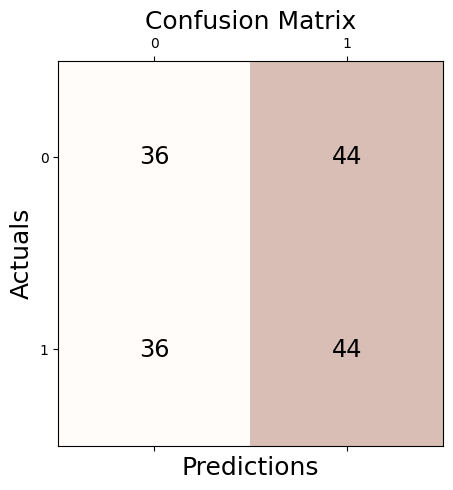

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
#
# Standardize the data set
#

#
# Fit the SVC model
#

#
# Get the predictions
#

#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=last_label, y_pred=last_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

##Test and Debug the Function

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import spacy
import numpy as np

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Load the spaCy model
nlp = spacy.load('en_core_web_trf')

# Your list of reviews
examples_fake = test_examples[:3]

# Initialize list for ordered embeddings
ordered_embeddings = []

# Dummy implementation of get_entity_index and all_embeddings for demonstration
def get_entity_index(text):
    # Replace this with the actual implementation
    if text == "the chicago hilton":
        return 0
    return None

# Assume all_embeddings contains vectors of varying sizes (1, 1, 768), (1, 2, 768), or (1, 3, 768)
all_embeddings = [np.random.rand(1, 3, 768), np.random.rand(1, 1, 768), np.random.rand(1, 2, 768)]  # Dummy embeddings for demonstration

# Function to get BERT embeddings
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

# Function to get spaBert embeddings
def get_spaBert_embedding(text):
    text = text.lower()  # Convert text to lowercase
    entity_index = get_entity_index(text)
    if entity_index is None or entity_index >= len(all_embeddings):
        return None
    else:
        embedding = all_embeddings[entity_index]
        # Ensure consistent shape by averaging if necessary
        return embedding.mean(axis=1)

# Step through each sentence and get the embeddings
for entry in examples_fake:
    review = entry[0]
    print("Sentence: " + review)
    doc = nlp(review)

    entity_spans = [(ent.start, ent.end, ent.text, ent.label_) for ent in doc.ents]

    token_embeddings = []

    i = 0
    while i < len(doc):
        if any(start == i for start, end, _, _ in entity_spans):
            # If the current token starts an entity, find the full entity
            for start, end, text, label in entity_spans:
                if start == i:
                    if label in ['FAC', 'ORG', 'LOC', 'GPE']:
                        # Try to get SpaBert embedding for the whole geo-entity
                        spaBert_emb = get_spaBert_embedding(text)
                        if spaBert_emb is not None:
                            spaBert_emb = spaBert_emb.flatten()  # Flatten to 1D tensor
                            print("Geo-Entity: " + text)
                            print("SpaBert Embedding shape: ", spaBert_emb.shape)
                            token_embeddings.append((text, spaBert_emb))
                        else:
                            # If spaBert embedding is None, get one BERT embedding for the whole geo-entity
                            bert_emb = get_bert_embedding(text)
                            print("Fallback BERT Embedding for Geo-Entity: " + text)
                            print("BERT Embedding shape: ", bert_emb.shape)
                            token_embeddings.append((text, bert_emb))
                    else:
                        # Get BERT embedding for non-spatial entity
                        bert_emb = get_bert_embedding(text)
                        print("BERT Embedding for: " + text)
                        print("BERT Embedding shape: ", bert_emb.shape)
                        token_embeddings.append((text, bert_emb))
                    i = end  # Move the index past the end of the entity
                    break
        else:
            # Get BERT embedding for non-entity token
            token = doc[i]
            bert_emb = get_bert_embedding(token.text)
            print("BERT Embedding for: " + token.text)
            print("BERT Embedding shape: ", bert_emb.shape)
            token_embeddings.append((token.text, bert_emb))
            i += 1

    # Append embeddings for the current review to the ordered list
    ordered_embeddings.append(token_embeddings)

# Convert embeddings to tensors for further processing
final_ordered_embeddings = [
    [(text, torch.tensor(embedding)) for text, embedding in review_embeddings]
    for review_embeddings in ordered_embeddings
]

# Print the results
print("Ordered Embeddings:")
for review_embeddings in final_ordered_embeddings:
    print("New Review:")
    for text, embedding in review_embeddings:
        print(f"{text}: {embedding}")


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Streaming output truncated to the last 5000 lines.
          2.2261e-02,  1.5613e-01, -1.4637e-01,  2.2165e-01, -7.7966e-01,
          1.4474e-01, -1.5885e-01, -8.3754e-02,  4.2861e-01, -4.8140e-01,
          4.5142e-01,  8.4319e-02,  9.6394e-02, -3.6360e-01, -1.9284e-01,
          4.6092e-01, -2.5313e-02,  1.0799e-01, -8.8430e-03,  5.8974e-02,
          7.1944e-02,  2.1046e-01, -2.2278e-02, -1.2261e-01,  1.7701e-01,
         -3.0559e-01, -6.3236e-01, -1.4660e-01,  1.4399e-01,  2.6545e-01,
          7.1084e-03, -2.8483e-01, -1.7965e-01,  1.2409e-01, -4.3654e-02,
          3.1850e-01,  3.3423e-02,  2.4867e-01,  5.9863e-01,  7.3530e-02,
         -5.0665e-01,  1.1876e-02, -2.2058e-02,  2.4579e-01,  9.9038e-02,
         -1.2338e-02,  4.5577e-01,  7.3283e-01,  1.0815e-01, -2.2509e-01,
          7.3798e-01, -1.3457e-01,  1.7850e-01, -3.6752e-01,  4.8011e-02,
         -1.3314e-01, -3.7726e-01,  1.4045e-01, -1.3854e-01,  1.7611e-01,
         -1.1418e-02,  2.9263e-01,  2.6873e-01, -8.2213e-02, 